In [1]:
import os
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def expand_pos_tag(tag):
    tag_definitions = {
        "NN": "Noun, singular or mass",
        "NNS": "Noun, plural",
        "NNP": "Proper noun, singular",
        "NNPS": "Proper noun, plural",
        "VB": "Verb, base form",
        "VBD": "Verb, past tense",
        "VBG": "Verb, gerund or present participle",
        "VBN": "Verb, past participle",
        "VBP": "Verb, non-3rd person singular present",
        "VBZ": "Verb, 3rd person singular present",
        "JJ": "Adjective",
        "JJR": "Adjective, comparative",
        "JJS": "Adjective, superlative",
        "RB": "Adverb",
        "RBR": "Adverb, comparative",
        "RBS": "Adverb, superlative",
        "PRP": "Personal pronoun",
        "PRP$": "Possessive pronoun",
        "IN": "Preposition or subordinating conjunction",
        "DT": "Determiner",
        "CC": "Coordinating conjunction",
        "CD": "Cardinal number",
        "MD": "Modal",
        "EX": "Existential there",
        "FW": "Foreign word",
        "POS": "Possessive ending",
        "RP": "Particle",
        "TO": "to",
        "WDT": "Wh-determiner",
        "WP": "Wh-pronoun",
        "WP$": "Possessive wh-pronoun",
        "WRB": "Wh-adverb"
    }
    return tag_definitions.get(tag, "Other")

from nltk.corpus import stopwords

def process_text_file(file_path):
    word_freq = Counter()
    all_tags = Counter()
    stop_words = set(stopwords.words('english'))  # Set of English stopwords

    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().lower()
        # Remove punctuation, apostrophes, and quotations
        text = text.translate(str.maketrans('', '', string.punctuation + "‘’“”"))
        tokens = word_tokenize(text)
        
        # Filter out stopwords
        filtered_tokens = [word for word in tokens if word not in stop_words]
        word_freq.update(filtered_tokens)

        # POS Tagging and expansion
        tagged = pos_tag(filtered_tokens)
        all_tags.update([expand_pos_tag(tag) for _, tag in tagged])

    return word_freq, all_tags

def print_common_elements(counter, title, filename=""):
    full_title = f"{title} {filename}" if filename else title
    print(f"{full_title}:")
    for element, count in counter.most_common(10):
        print(f"{element}: {count}")
    print("\n")

directory_path = r"C:\Users\hosan\Downloads\Mystery_TXTS"
directory_word_freq = Counter()
directory_all_tags = Counter()

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        word_freq, all_tags = process_text_file(file_path)

        # Print most common words and POS tags for each file
        print(f"File: {filename}")
        print_common_elements(word_freq, "Most common words")
        print_common_elements(all_tags, "Most common Part Of Speech tags for", filename)

        # Aggregate data for overall directory analysis
        directory_word_freq.update(word_freq)
        directory_all_tags.update(all_tags)

# Print most common words and POS tags for the entire directory
print("Overall for Directory:")
print_common_elements(directory_word_freq, "Most common words in directory")
print_common_elements(directory_all_tags, "Most common Part Of Speech tags for Mystery")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hosan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hosan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


File: A Lady in Black.txt
Most common words:
mabin: 466
mrs: 407
dale: 273
said: 233
rudolph: 162
one: 160
would: 152
know: 122
face: 120
little: 115


Most common Part Of Speech tags for A Lady in Black.txt:
Noun, singular or mass: 6942
Adjective: 4619
Verb, past tense: 2415
Adverb: 2076
Noun, plural: 1654
Verb, non-3rd person singular present: 893
Verb, gerund or present participle: 893
Verb, past participle: 879
Verb, base form: 829
Preposition or subordinating conjunction: 525


File: A Study in Scarlet.txt
Most common words:
said: 207
upon: 198
one: 156
man: 132
would: 123
could: 97
holmes: 94
little: 82
two: 79
time: 76


Most common Part Of Speech tags for A Study in Scarlet.txt:
Noun, singular or mass: 6239
Adjective: 3586
Verb, past tense: 2046
Noun, plural: 1807
Adverb: 1430
Verb, past participle: 872
Verb, gerund or present participle: 768
Verb, non-3rd person singular present: 652
Verb, base form: 574
Preposition or subordinating conjunction: 516


File: Arsene Lupin.txt
Mo

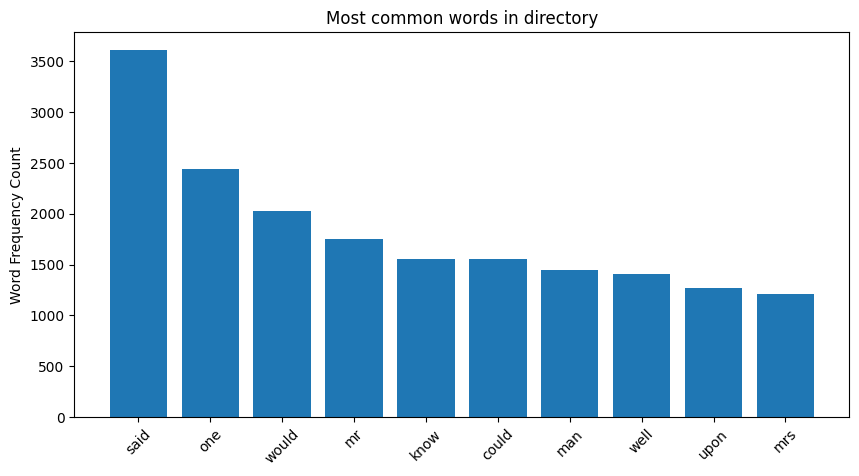

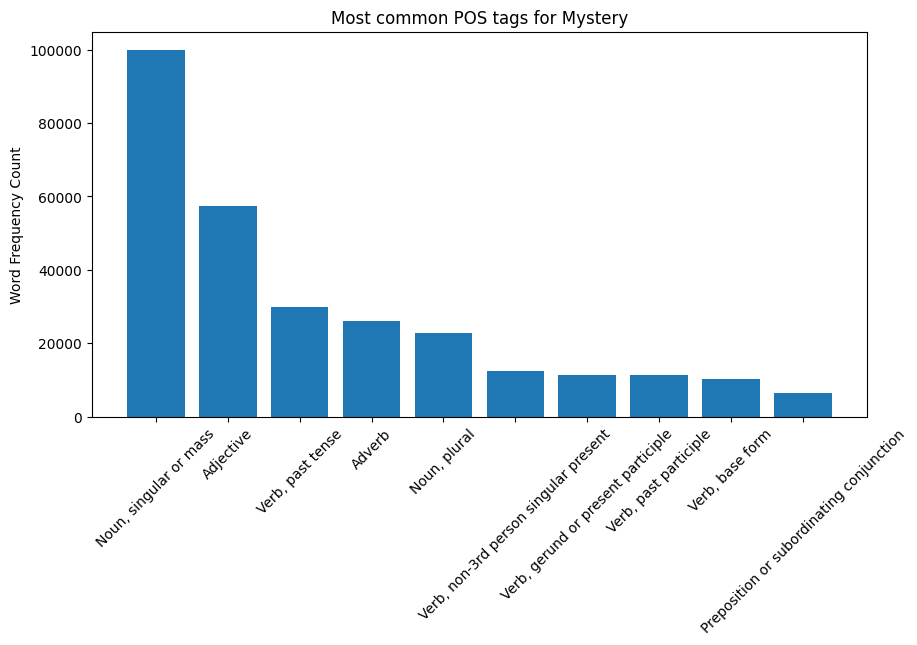

In [2]:
import matplotlib.pyplot as plt

# Function to plot the most common elements
def plot_common_elements(counter, title):
    elements, counts = zip(*counter.most_common(10))
    plt.figure(figsize=(10, 5))
    plt.bar(elements, counts)
    plt.title(title)
    plt.ylabel("Word Frequency Count")
    plt.xticks(rotation=45)
    plt.show()

# Visualize the overall most common words and POS tags
plot_common_elements(directory_word_freq, "Most common words in directory")
plot_common_elements(directory_all_tags, "Most common POS tags for Mystery")

In [3]:
import plotly.express as px
import os

def plot_pie_chart(counter, title, filename):
    # Prepare data for the pie chart
    labels, values = zip(*counter.most_common(10))

    # Create the pie chart
    fig = px.pie(values=values, names=labels, title=f"{title} - {filename}")
    fig.update_traces(textinfo='percent+label', hoverinfo='label+value')

    # Show the plot
    fig.show()

directory_path = r'C:\Users\hosan\Downloads\Mystery_TXTS'

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        word_freq, _ = process_text_file(file_path)

        # Plot pie chart for each file
        plot_pie_chart(word_freq, "Word Distribution", filename)

In [4]:
import spacy
import os

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

def analyze_sentence_structure(directory):
    sentence_count = 0
    word_count = 0
    pos_count = {}

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                text = file.read()
                doc = nlp(text)

                for sent in doc.sents:
                    sentence_count += 1
                    for token in sent:
                        word_count += 1
                        pos_count[token.pos_] = pos_count.get(token.pos_, 0) + 1

    return sentence_count, word_count, pos_count

directory_path = r"C:\Users\hosan\Downloads\Mystery_TXTS"
sentence_count, word_count, pos_count = analyze_sentence_structure(directory_path)

print(f"Total number of sentences: {sentence_count}")
print(f"Total number of words: {word_count}")
print("Part Of Speech counts:", pos_count)

Total number of sentences: 43589
Total number of words: 873293
Part Of Speech counts: {'PROPN': 33821, 'ADP': 70313, 'SPACE': 62444, 'PRON': 101245, 'PUNCT': 146714, 'CCONJ': 23508, 'ADV': 40077, 'VERB': 93397, 'ADJ': 40605, 'DET': 62264, 'NOUN': 102368, 'PART': 20022, 'AUX': 48556, 'SCONJ': 19124, 'NUM': 4783, 'INTJ': 3806, 'X': 215, 'SYM': 31}


Total number of sentences: 43589
Total number of words: 873293
Part Of Speech counts: {'PROPN': 33821, 'ADP': 70313, 'SPACE': 62444, 'PRON': 101245, 'PUNCT': 146714, 'CCONJ': 23508, 'ADV': 40077, 'VERB': 93397, 'ADJ': 40605, 'DET': 62264, 'NOUN': 102368, 'PART': 20022, 'AUX': 48556, 'SCONJ': 19124, 'NUM': 4783, 'INTJ': 3806, 'X': 215, 'SYM': 31}


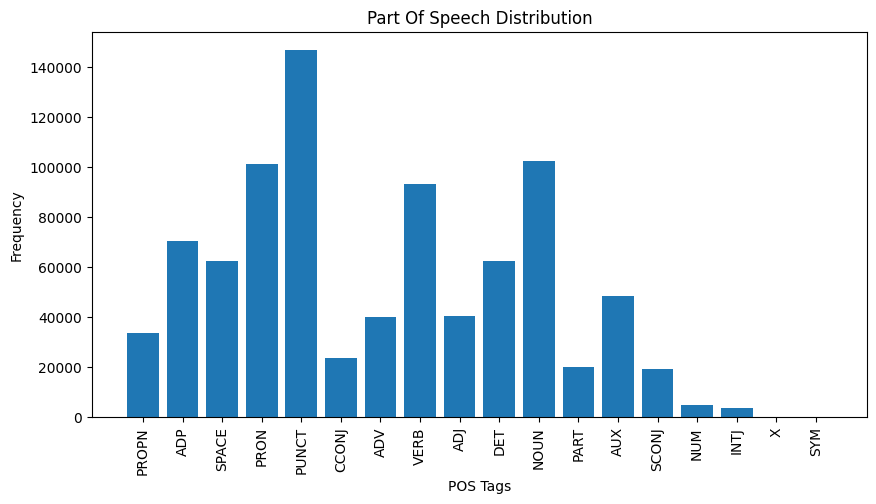

In [5]:
import matplotlib.pyplot as plt
import spacy
import os

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

def analyze_sentence_structure(directory):
    sentence_count = 0
    word_count = 0
    pos_count = {}

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                text = file.read()
                doc = nlp(text)

                for sent in doc.sents:
                    sentence_count += 1
                    for token in sent:
                        word_count += 1
                        pos_count[token.pos_] = pos_count.get(token.pos_, 0) + 1

    return sentence_count, word_count, pos_count

def plot_pos_distribution(pos_count):
    labels, values = zip(*pos_count.items())
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values)
    plt.title('Part Of Speech Distribution')
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.show()

directory_path = r"C:\Users\hosan\Downloads\Mystery_TXTS"
sentence_count, word_count, pos_count = analyze_sentence_structure(directory_path)

print(f"Total number of sentences: {sentence_count}")
print(f"Total number of words: {word_count}")
print("Part Of Speech counts:", pos_count)

# Visualize the POS distribution
plot_pos_distribution(pos_count)

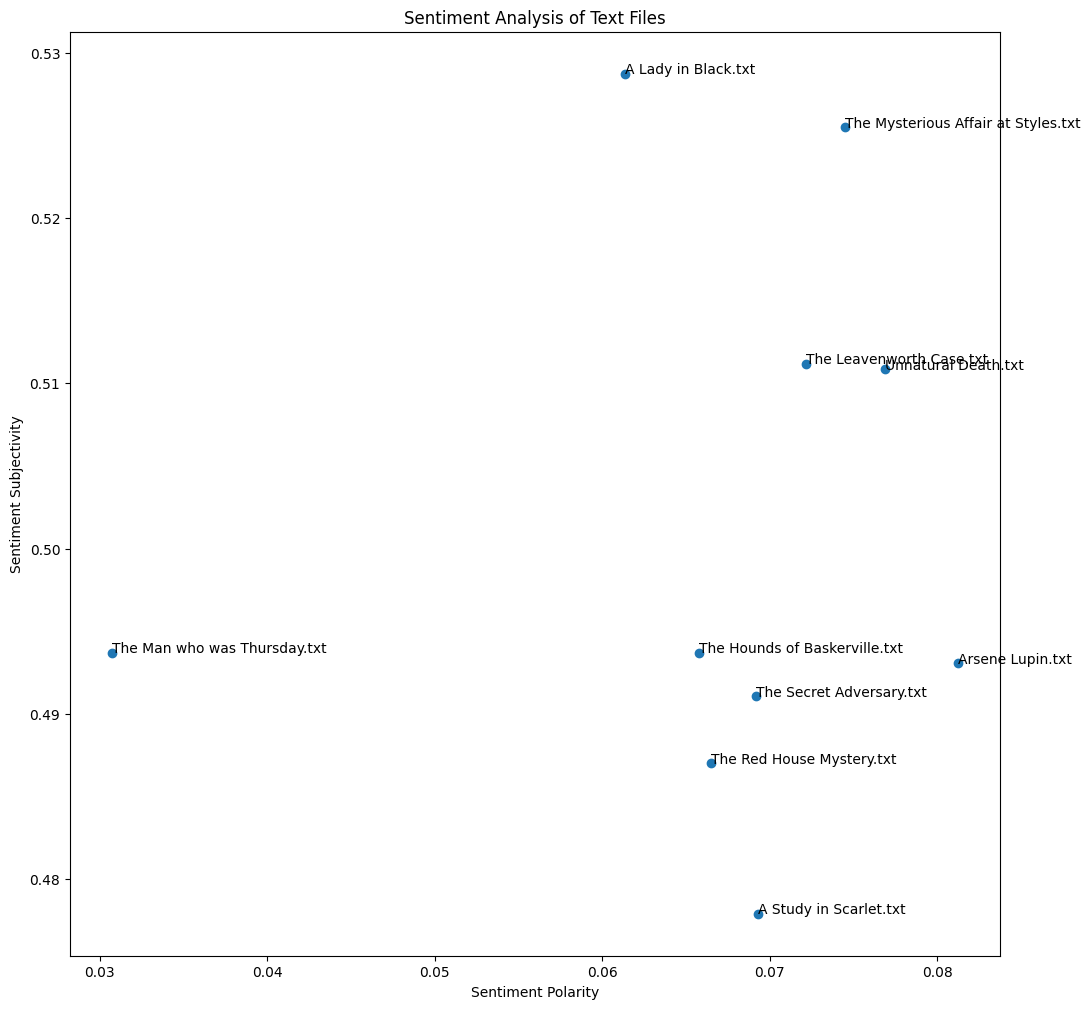

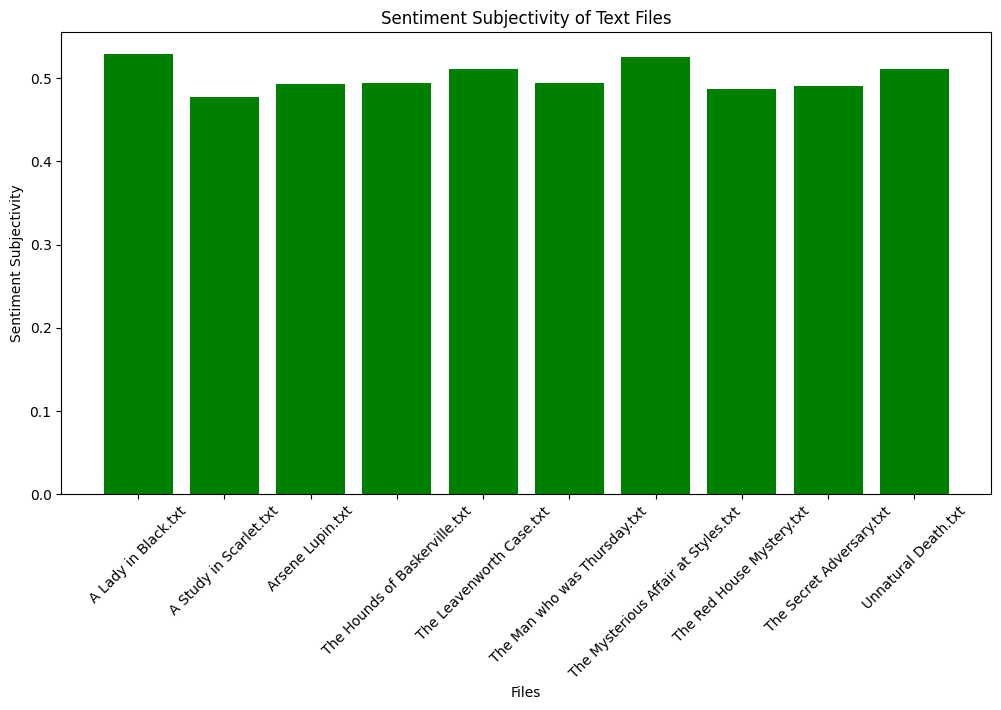

In [6]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import os

def analyze_sentiment(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        blob = TextBlob(text)
        return blob.sentiment

directory_path = r"C:\Users\hosan\Downloads\Mystery_TXTS"
sentiments = []

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        sentiment = analyze_sentiment(file_path)
        sentiments.append((filename, sentiment.polarity, sentiment.subjectivity))

# Extracting filenames, polarities, and subjectivities
filenames, polarities, subjectivities = zip(*sentiments)

# Scatter Plot
plt.figure(figsize=(12,12))
plt.scatter(polarities, subjectivities)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Analysis of Text Files')
for i, filename in enumerate(filenames):
    plt.annotate(filename, (polarities[i], subjectivities[i]))
plt.show()

# Bar Chart for Polarity
plt.figure(figsize=(12, 6))
plt.bar(filenames, polarities, color='blue')
plt.xlabel('Files')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity of Text Files')
plt.xticks(rotation=45)
plt.show()

# Bar Chart for Subjectivity
plt.figure(figsize=(12, 6))
plt.bar(filenames, subjectivities, color='green')
plt.xlabel('Files')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Subjectivity of Text Files')
plt.xticks(rotation=45)
plt.show()

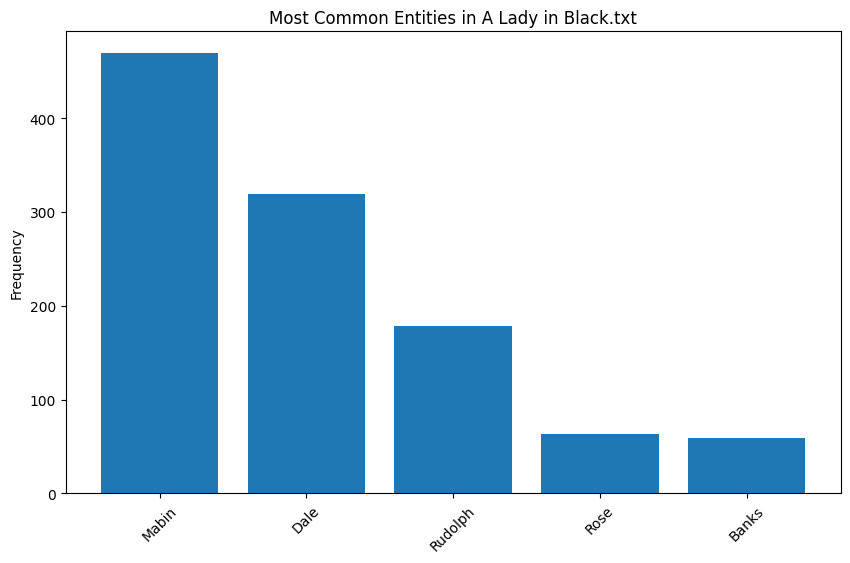

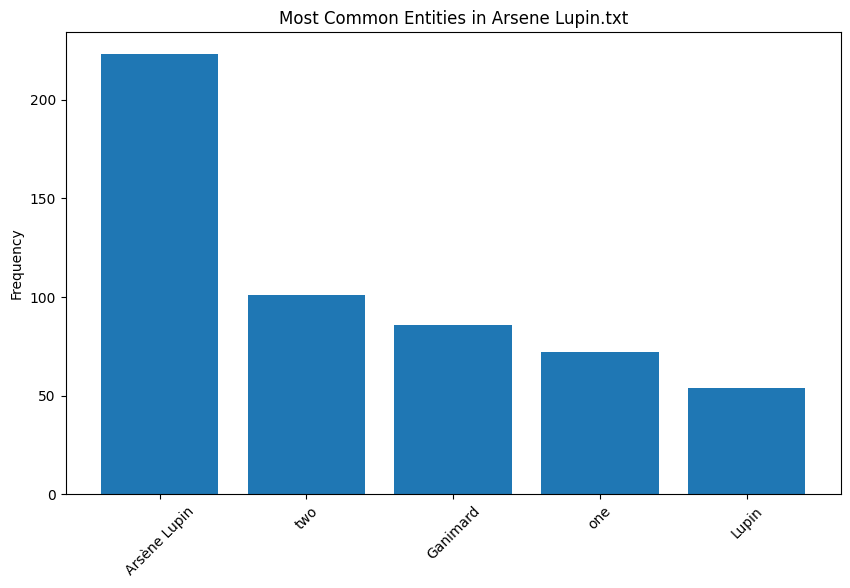

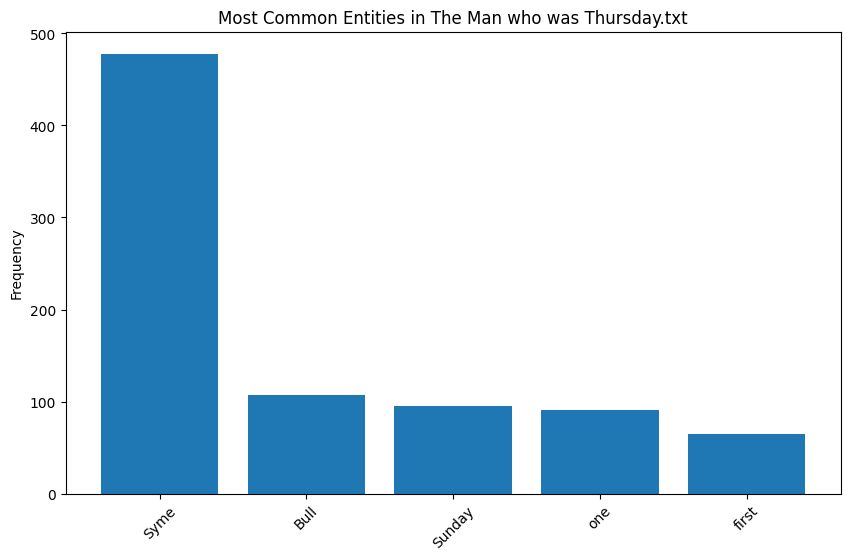

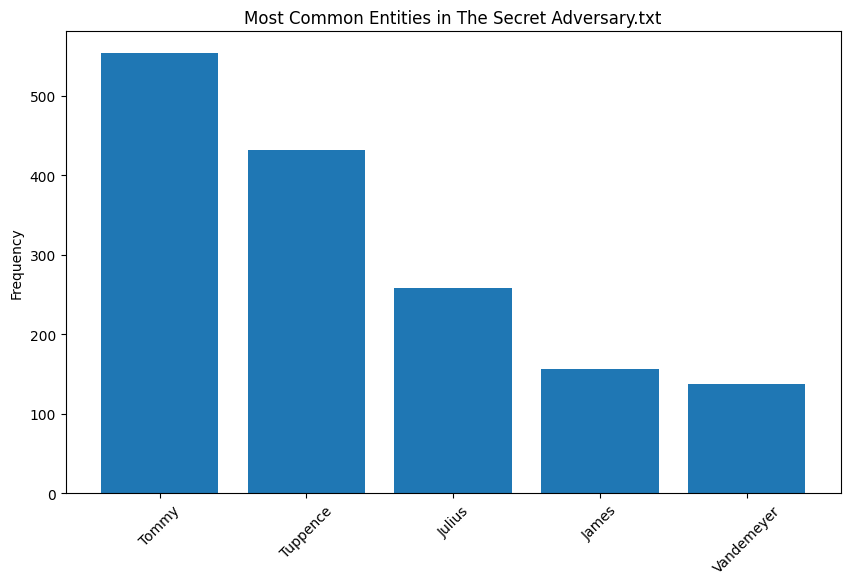

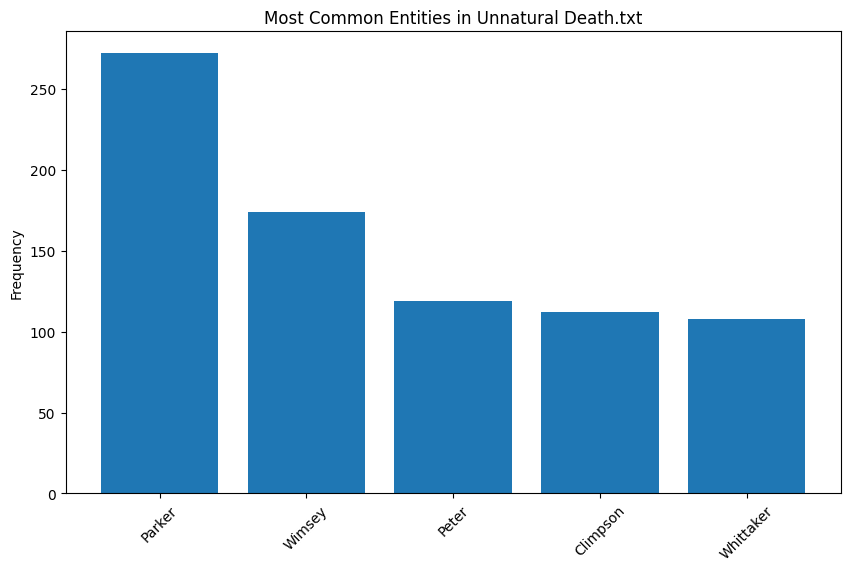

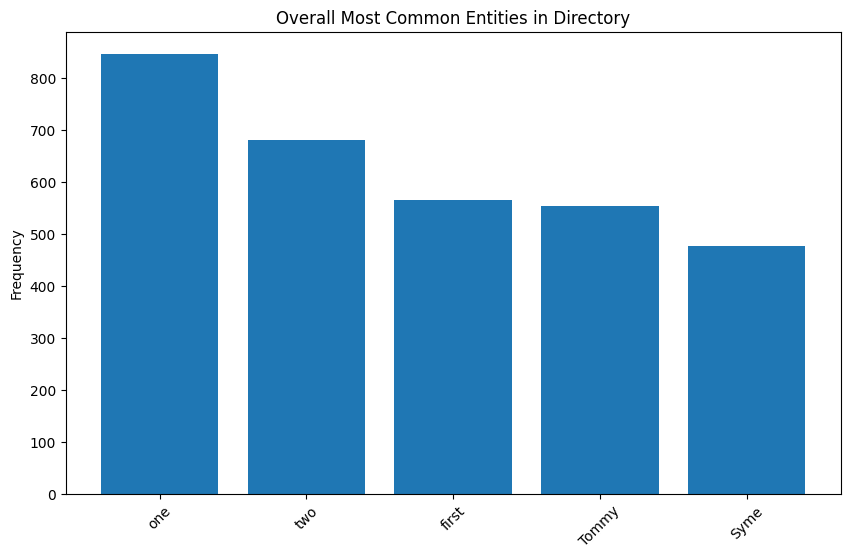

In [7]:
import matplotlib.pyplot as plt
import spacy
import os
from collections import Counter

# Load SpaCy English model
nlp = spacy.load('en_core_web_sm')

def extract_entities(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        doc = nlp(text)
        entities = [ent.text for ent in doc.ents]
    return Counter(entities)

def plot_entity_distribution(entities_counter, title, top_n=5):
    entities, counts = zip(*entities_counter.most_common(top_n))
    plt.figure(figsize=(10, 6))
    plt.bar(entities, counts)
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

directory_path = r"C:\Users\hosan\Downloads\Mystery_TXTS"
overall_entities = Counter()

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        file_entities = extract_entities(file_path)

        # Plot bar chart for each file
        plot_title = f"Most Common Entities in {filename}"
        plot_entity_distribution(file_entities, plot_title)

        overall_entities.update(file_entities)

# Optionally, plot overall most common entities across all files
plot_entity_distribution(overall_entities, "Overall Most Common Entities in Directory")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hosan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


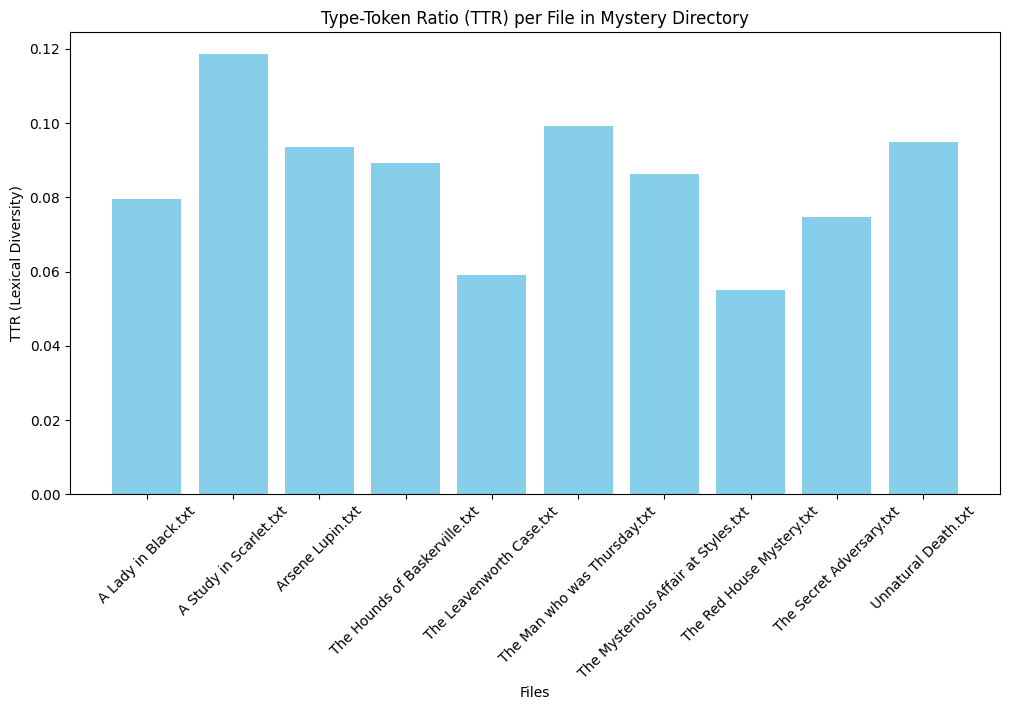

Overall Lexical Diversity for the Directory: 0.030


In [8]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Function to calculate TTR
def calculate_ttr(text):
    tokens = word_tokenize(text)
    types = set(tokens)
    if len(tokens) == 0:
        return 0
    return len(types) / len(tokens)

# Function to plot TTR
def plot_ttr(ttr_values, title):
    filenames, ttr_scores = zip(*ttr_values)
    plt.figure(figsize=(12, 6))
    plt.bar(filenames, ttr_scores, color='skyblue')
    plt.xlabel('Files')
    plt.ylabel('TTR (Lexical Diversity)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

directory_path = r"C:\Users\hosan\Downloads\Mystery_TXTS"
overall_tokens = []
overall_types = set()
file_ttr_values = []

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
            text = file.read().lower()
            file_ttr = calculate_ttr(text)

            # Collect TTR values for each file
            file_ttr_values.append((filename, file_ttr))

            # For overall TTR calculation
            tokens = word_tokenize(text)
            overall_tokens.extend(tokens)
            overall_types.update(tokens)

# Plot TTR for each file
plot_ttr(file_ttr_values, "Type-Token Ratio (TTR) per File in Mystery Directory")

# Overall TTR for the directory
overall_ttr = calculate_ttr(' '.join(overall_tokens))
print(f"Overall Lexical Diversity for the Directory: {overall_ttr:.3f}")

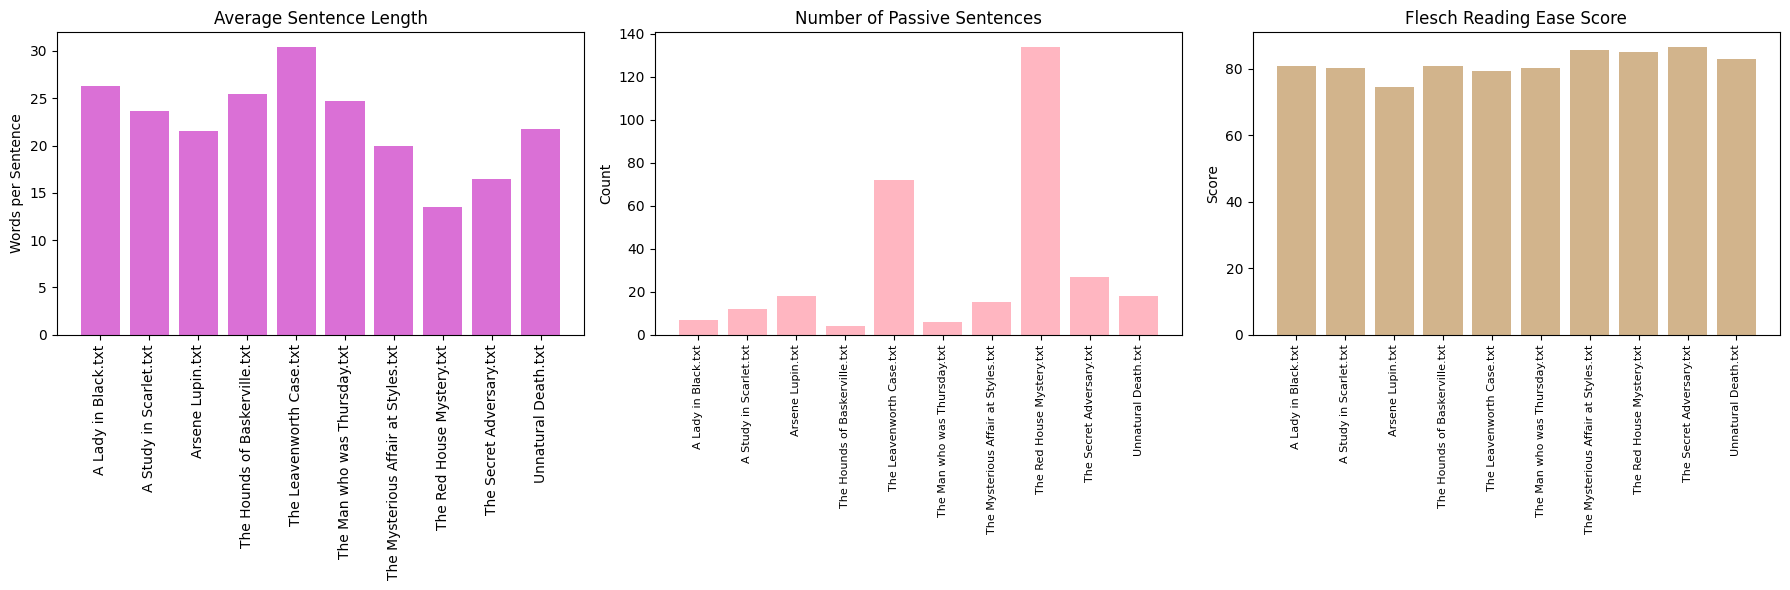

In [9]:
import matplotlib.pyplot as plt
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import textstat

# Function to analyze the style of text in a file
def analyze_style(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    sentences = sent_tokenize(text)
    if len(sentences) == 0:
        return 0, 0, 0  # Avoid division by zero

    average_sentence_length = sum(len(word_tokenize(sentence)) for sentence in sentences) / len(sentences)
    blob = TextBlob(text)
    passive_sentences = sum(1 for sentence in blob.sentences if sentence.tags and sentence.tags[0][1] in ['VBN', 'VBD'])

    flesch_reading_ease = textstat.flesch_reading_ease(text)

    return average_sentence_length, passive_sentences, flesch_reading_ease

# Analyze and collect data for each file in the directory
directory_path = r'C:\Users\hosan\Downloads\Mystery_TXTS'
style_data = []

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        avg_sentence_length, passive_sentences, reading_ease = analyze_style(file_path)
        style_data.append((filename, avg_sentence_length, passive_sentences, reading_ease))

# Extracting data for visualization
filenames, avg_lengths, passive_counts, reading_eases = zip(*style_data)

# Visualization
plt.figure(figsize=(18, 6))  # Increase the size of the figure

# Average Sentence Length
plt.subplot(1, 3, 1)
plt.bar(filenames, avg_lengths, color='orchid')
plt.title('Average Sentence Length')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size
plt.ylabel('Words per Sentence')

# Passive Sentences Count
plt.subplot(1, 3, 2)
plt.bar(filenames, passive_counts, color='lightpink')
plt.title('Number of Passive Sentences')
plt.xticks(rotation=90, fontsize=8)  # Rotate and adjust font size
plt.ylabel('Count')

# Flesch Reading Ease Score
plt.subplot(1, 3, 3)
plt.bar(filenames, reading_eases, color='tan')
plt.title('Flesch Reading Ease Score')
plt.xticks(rotation=90, fontsize=8)  # Rotate and adjust font size
plt.ylabel('Score')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [10]:
import spacy
import os
import re

nlp = spacy.load('en_core_web_sm')

def extract_dialogues(text):
    dialogues = re.findall(r'“([^”]+)”', text)
    cleaned_dialogues = [' '.join(dialogue.split()) for dialogue in dialogues]  # Remove extra spaces and newlines
    return cleaned_dialogues

def extract_characters_and_dialogues(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        doc = nlp(text)

    characters = set([ent.text for ent in doc.ents if ent.label_ == "PERSON"])
    dialogues = extract_dialogues(text)

    return characters, dialogues

directory_path = r'C:\Users\hosan\Downloads\Mystery_TXTS'
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        characters, dialogues = extract_characters_and_dialogues(file_path)
        
        print(f"File: {filename}")
        print("Characters:", characters)
        print("Sample Dialogues:", dialogues[:5])  # Display first 5 dialogues

File: A Lady in Black.txt
Characters: {'Solomon', 'Lady Mallyan’s', 'Dorothy Leatham', 'strawberry', 'Mabin Rose', 'Walter', 'Unconsciously Mabin', 'Yorkshire', 'Nineteen', 'Miss Mabin', 'Geoffrey Mallyan', 'Roses', 'Across Mabin', 'Bradleys', 'Rudolph', 'Bonningtons', 'Bonnington', 'I.', 'bush', 'Annie', 'Geoffrey', 'John Lang', 'eau de Cologne', 'Todcaster', 'Bradley', 'Hush', 'Solomons', 'Shocker', 'Langford', 'Lady\nMallyan', 'Langton', 'Peak', 'Dorothy', 'Ethel', 'Miss Rose', 'Haybrow', 'Mabin', 'Rose', 'Warren', 'Roses I', 'Lady Mallyan', 'Dale', 'Banks', 'Willie', 'Dolly Leatham', 'Emily', 'gaucherie', 'Miss Bradley'}
Sample Dialogues: ['And besides, you know, my dear Mrs. Rose, there is generally something wrong about a woman who dresses so very well.', 'nerves,', 'That’s what I always say. Especially a widow. I’m sure if anything were to happen to my husband,', 'the last thing I should think about would be my dress. I should be far too unhappy to trouble myself about the fit o

In [11]:
import spacy
import os
from collections import defaultdict

nlp = spacy.load('en_core_web_sm')

def extract_interactions(text):
    doc = nlp(text)
    interactions = defaultdict(int)

    for sent in doc.sents:
        characters = set([ent.text for ent in sent.ents if ent.label_ == "PERSON"])
        for char1 in characters:
            for char2 in characters:
                if char1 != char2:
                    interactions[(char1, char2)] += 1

    return interactions

directory_path = r'C:\Users\hosan\Downloads\Mystery_TXTS'

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            interactions = extract_interactions(text)

            print(f"Interactions in {filename}:")
            for pair, count in interactions.items():
                print(f"{pair}: {count}")
            print("\n")  # Adds a newline for better readability between files

Interactions in A Lady in Black.txt:
('Rose', 'Mabin Rose'): 1
('Mabin Rose', 'Rose'): 1
('Bonnington', 'Solomons'): 1
('Solomons', 'Bonnington'): 1
('Solomon', 'Mabin'): 1
('Mabin', 'Solomon'): 1
('Rose', 'Dale'): 10
('Dale', 'Rose'): 10
('Mabin', 'Dale'): 77
('Dale', 'Mabin'): 77
('Warren', 'Peak'): 1
('Warren', 'Bradleys'): 1
('Peak', 'Warren'): 1
('Peak', 'Bradleys'): 1
('Bradleys', 'Warren'): 1
('Bradleys', 'Peak'): 1
('Bonnington', 'Rose'): 4
('Rose', 'Bonnington'): 4
('Mabin', 'Rose'): 9
('Rose', 'Mabin'): 9
('Rudolph', 'Dale'): 29
('Dale', 'Rudolph'): 29
('Bonnington', 'Dorothy Leatham'): 1
('Dorothy Leatham', 'Bonnington'): 1
('Haybrow', 'Rose'): 8
('Rose', 'Haybrow'): 8
('Bonnington', 'Mabin'): 5
('Mabin', 'Bonnington'): 5
('Mabin', 'Rudolph'): 28
('Rudolph', 'Mabin'): 28
('Rudolph', 'Bonningtons'): 1
('Bonningtons', 'Rudolph'): 1
('Bonnington', 'Dale'): 2
('Dale', 'Bonnington'): 2
('Roses I', 'Mabin'): 1
('Mabin', 'Roses I'): 1
('Rose', 'Emily'): 1
('Emily', 'Rose'): 1
('Mab

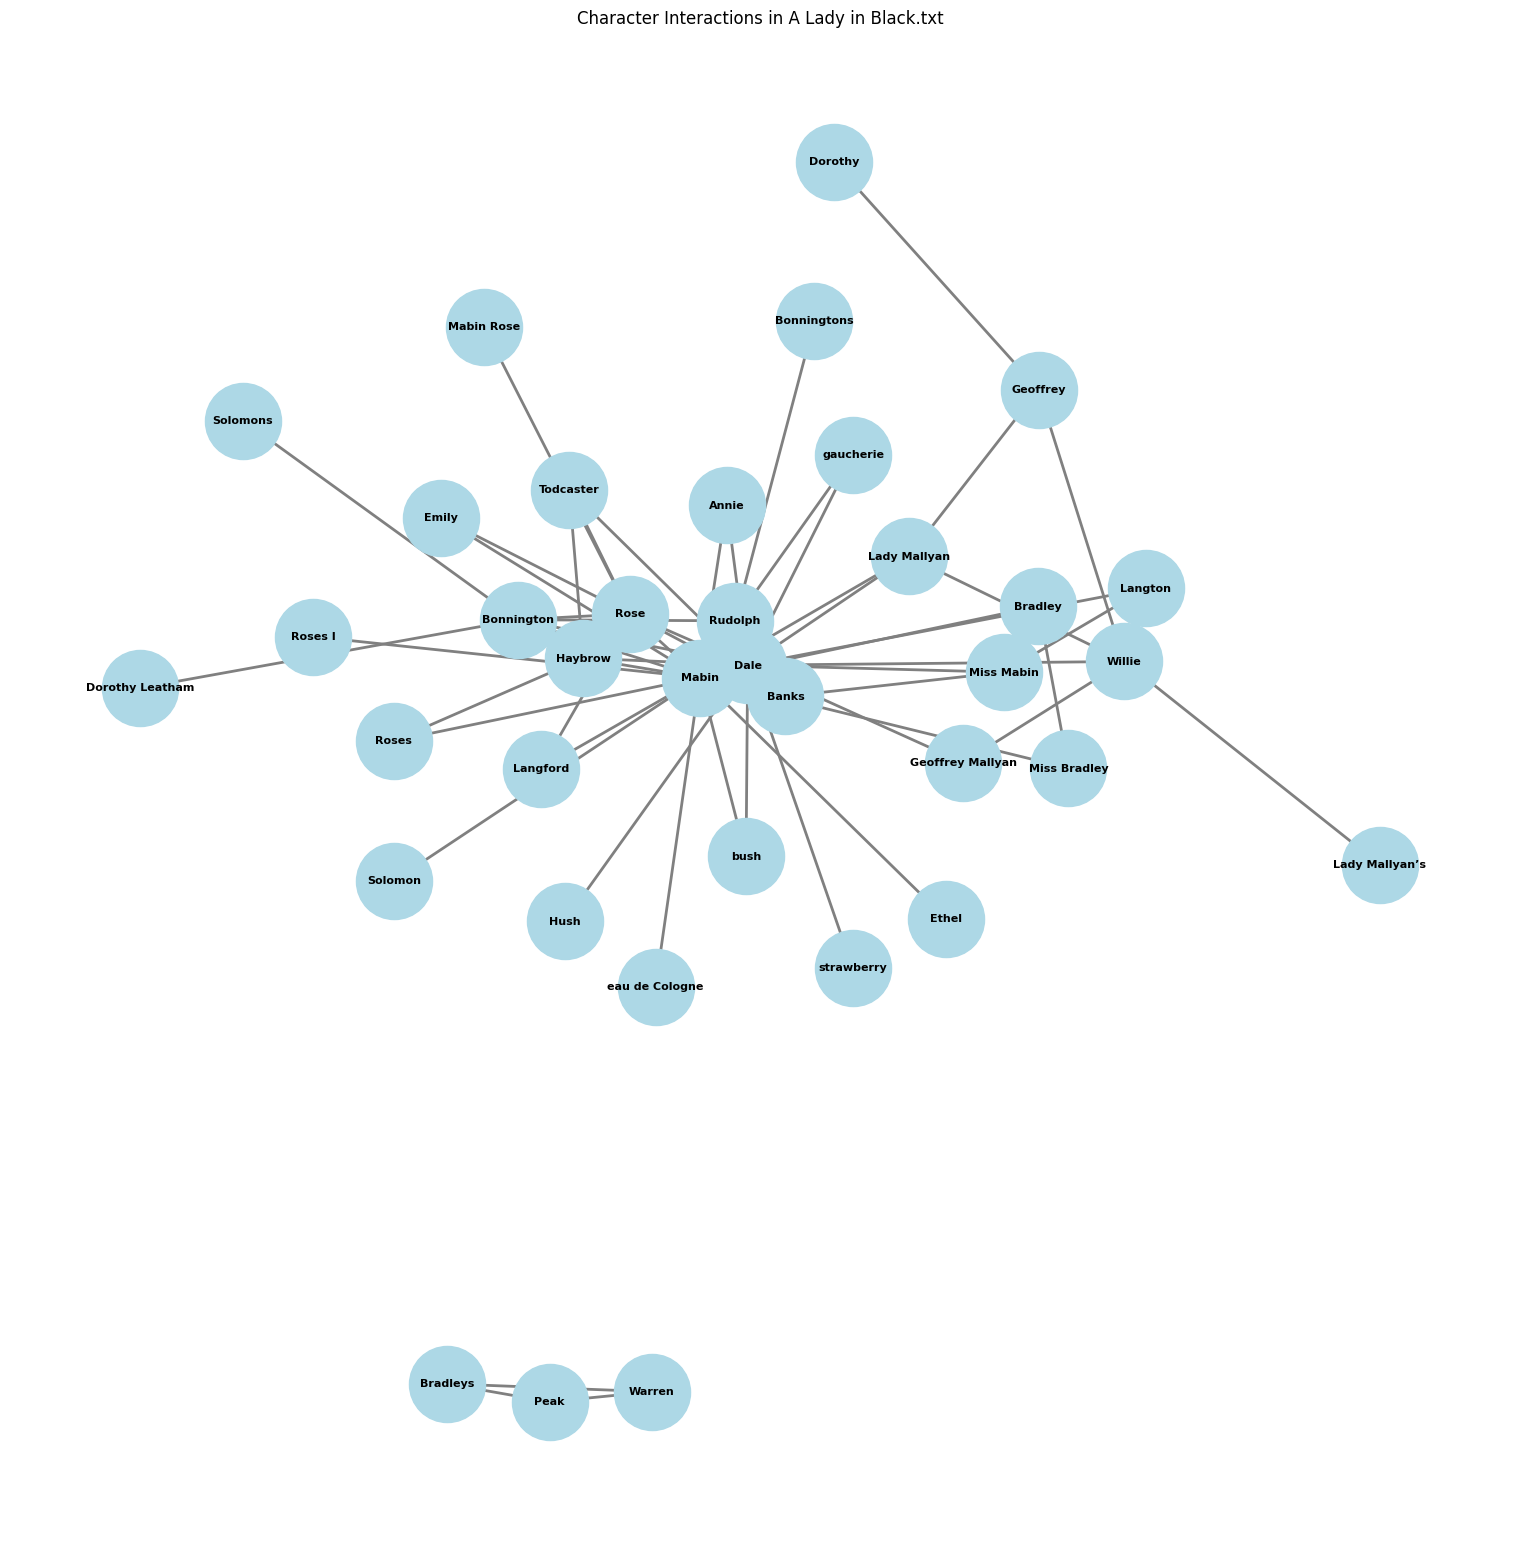

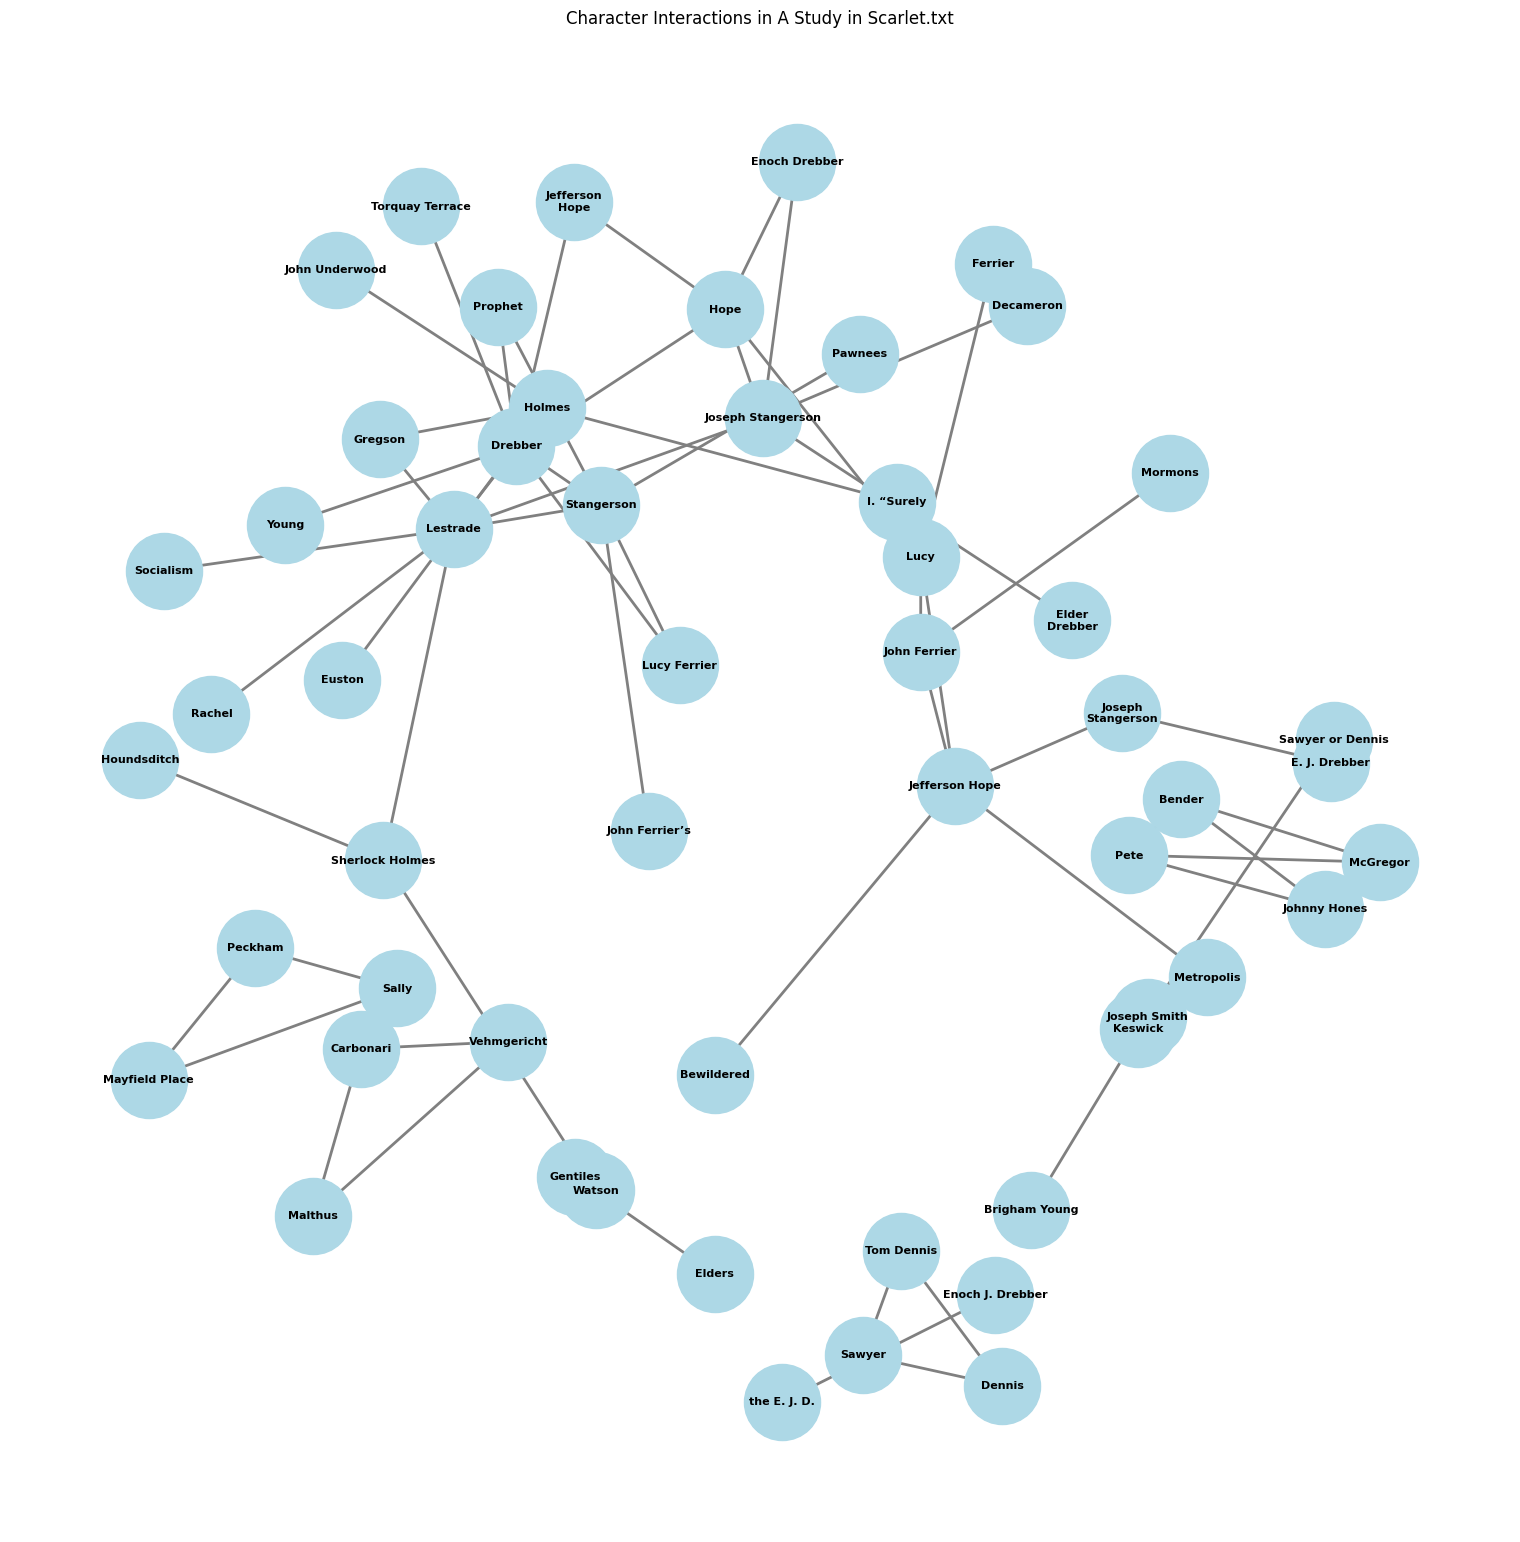

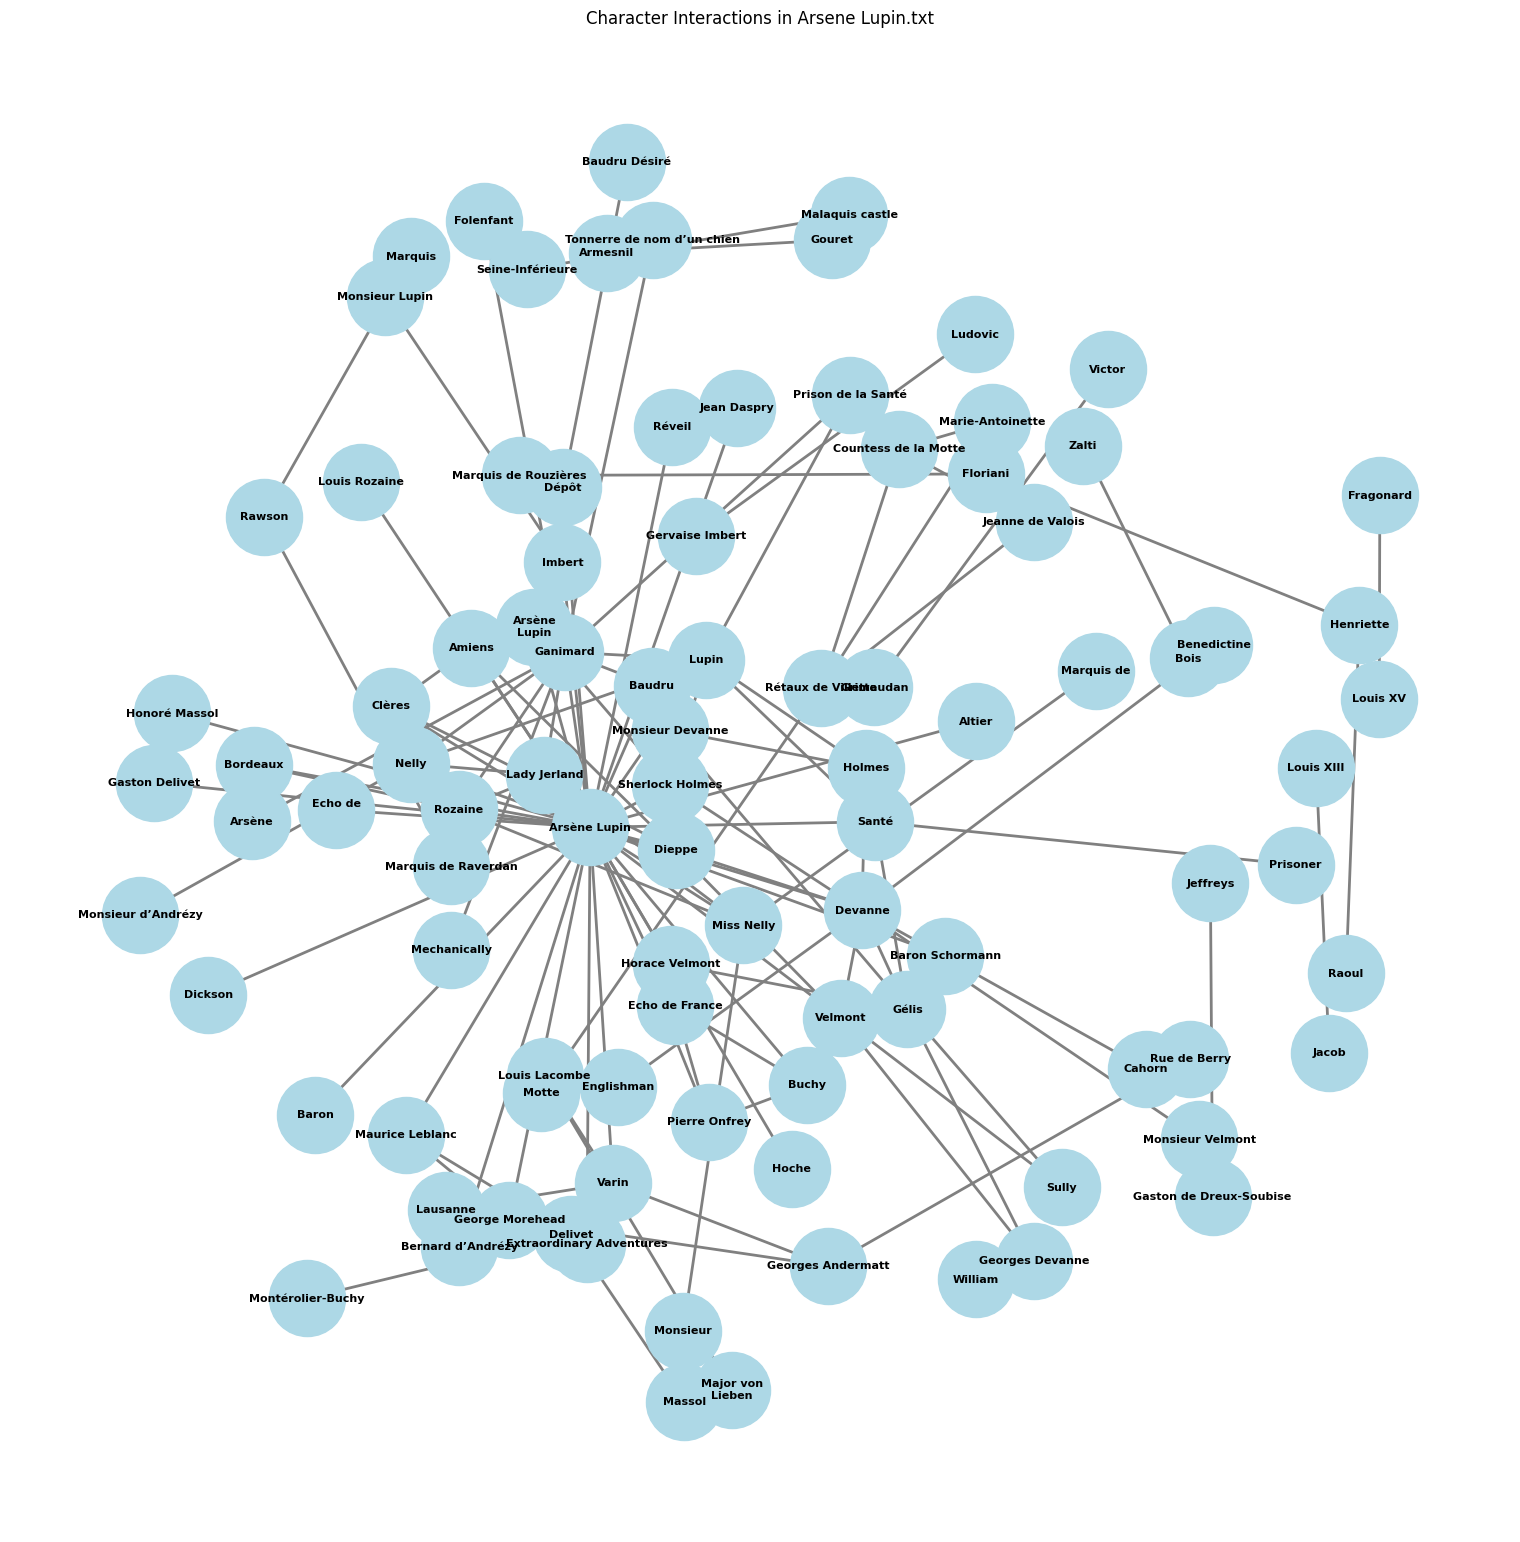

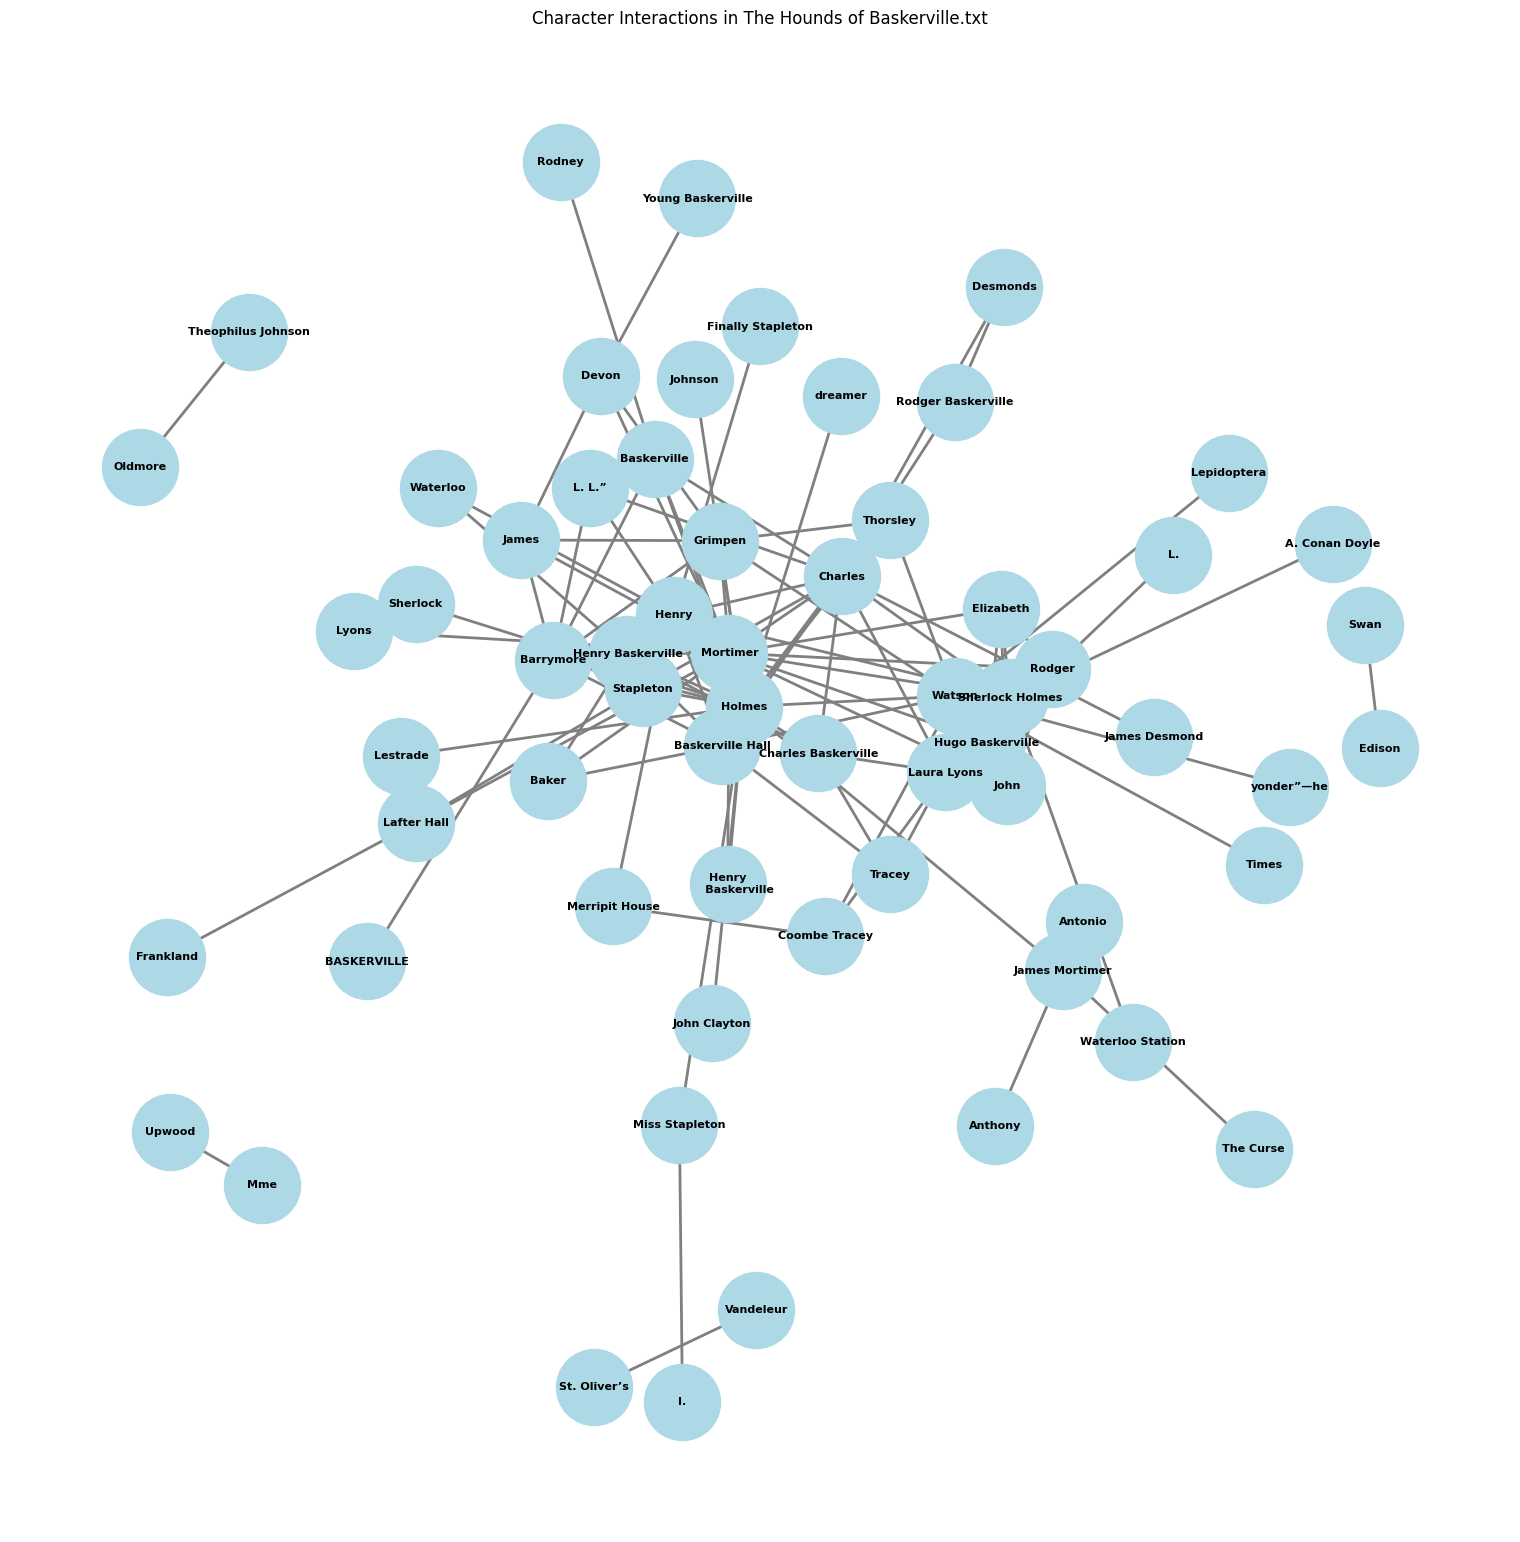

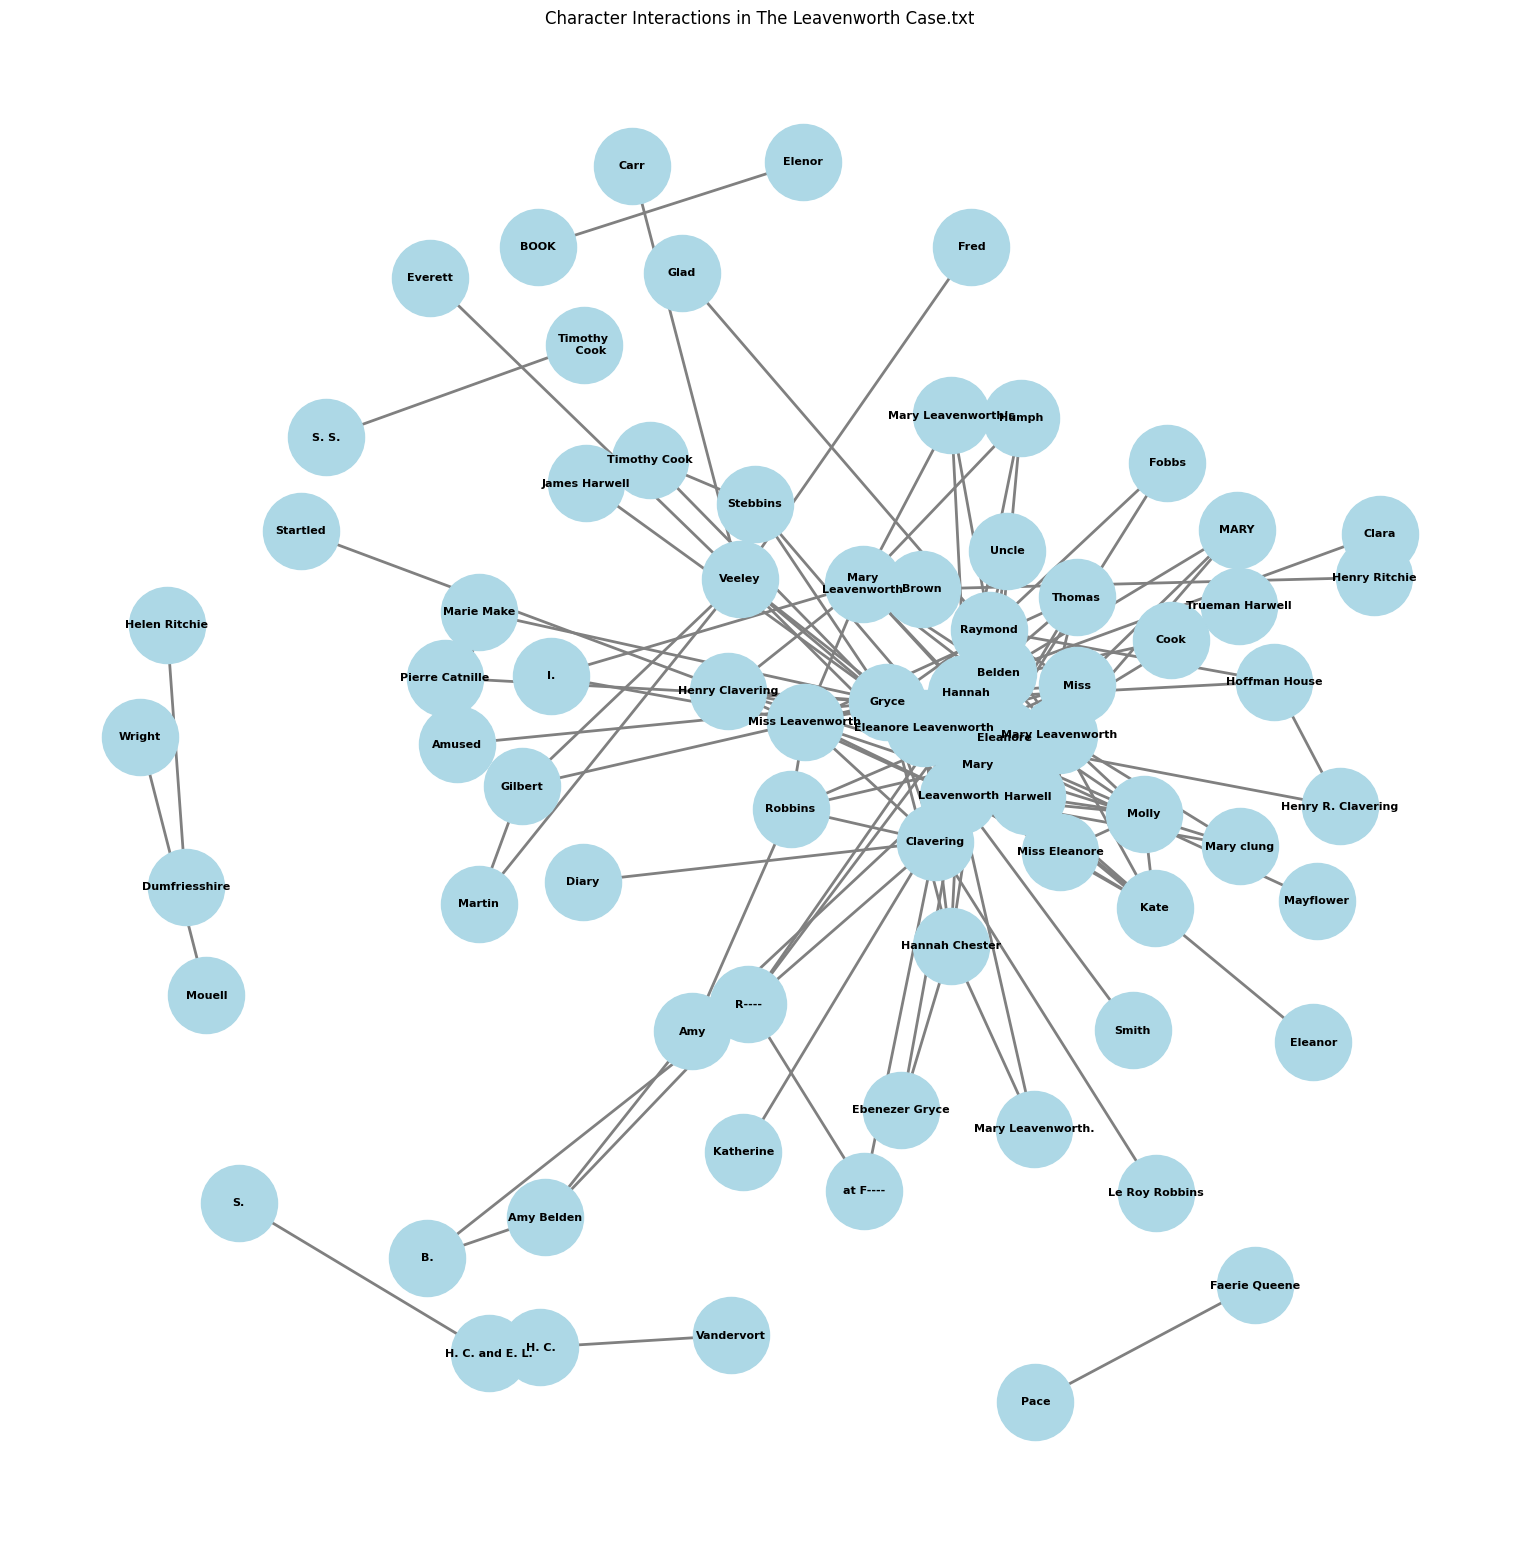

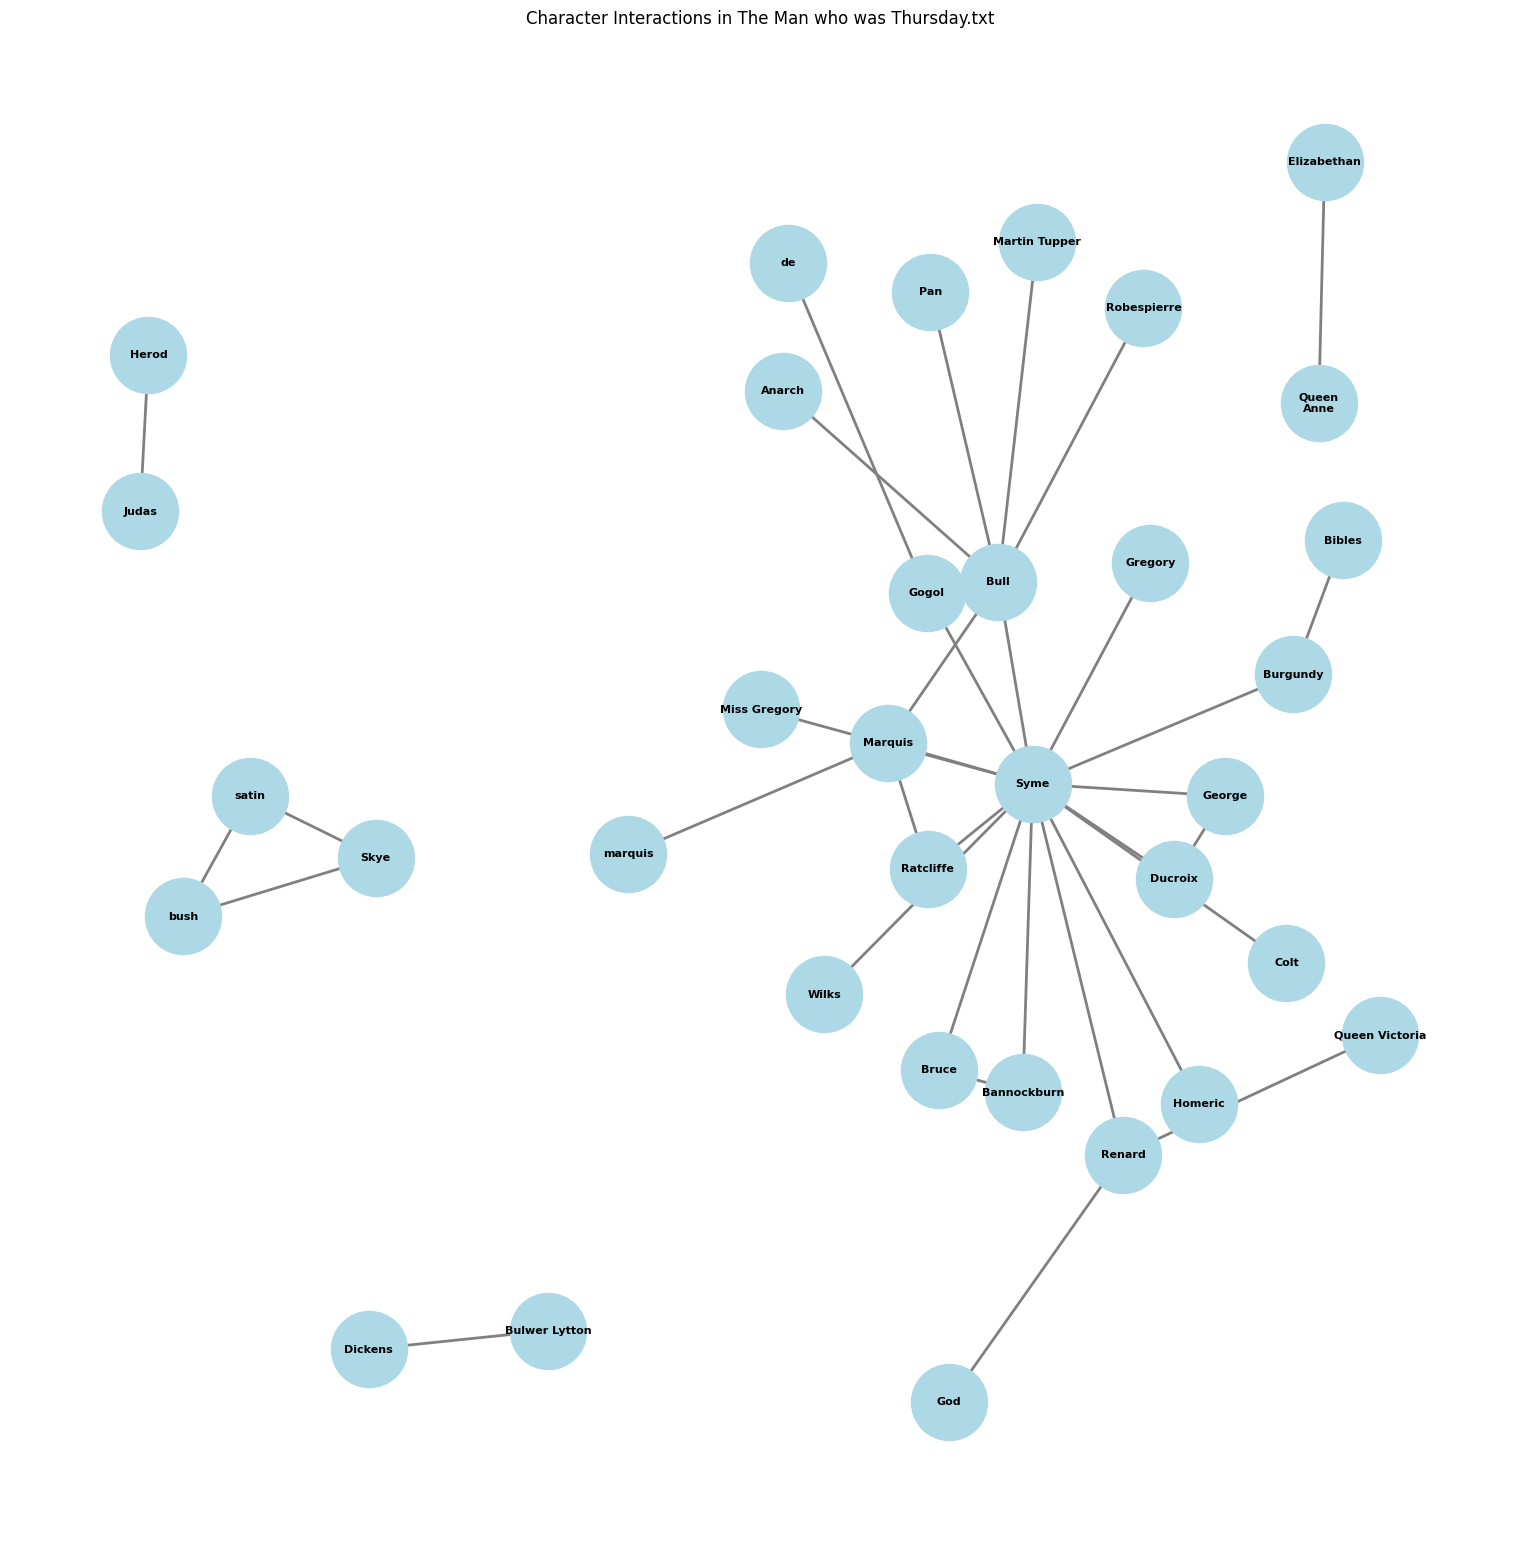

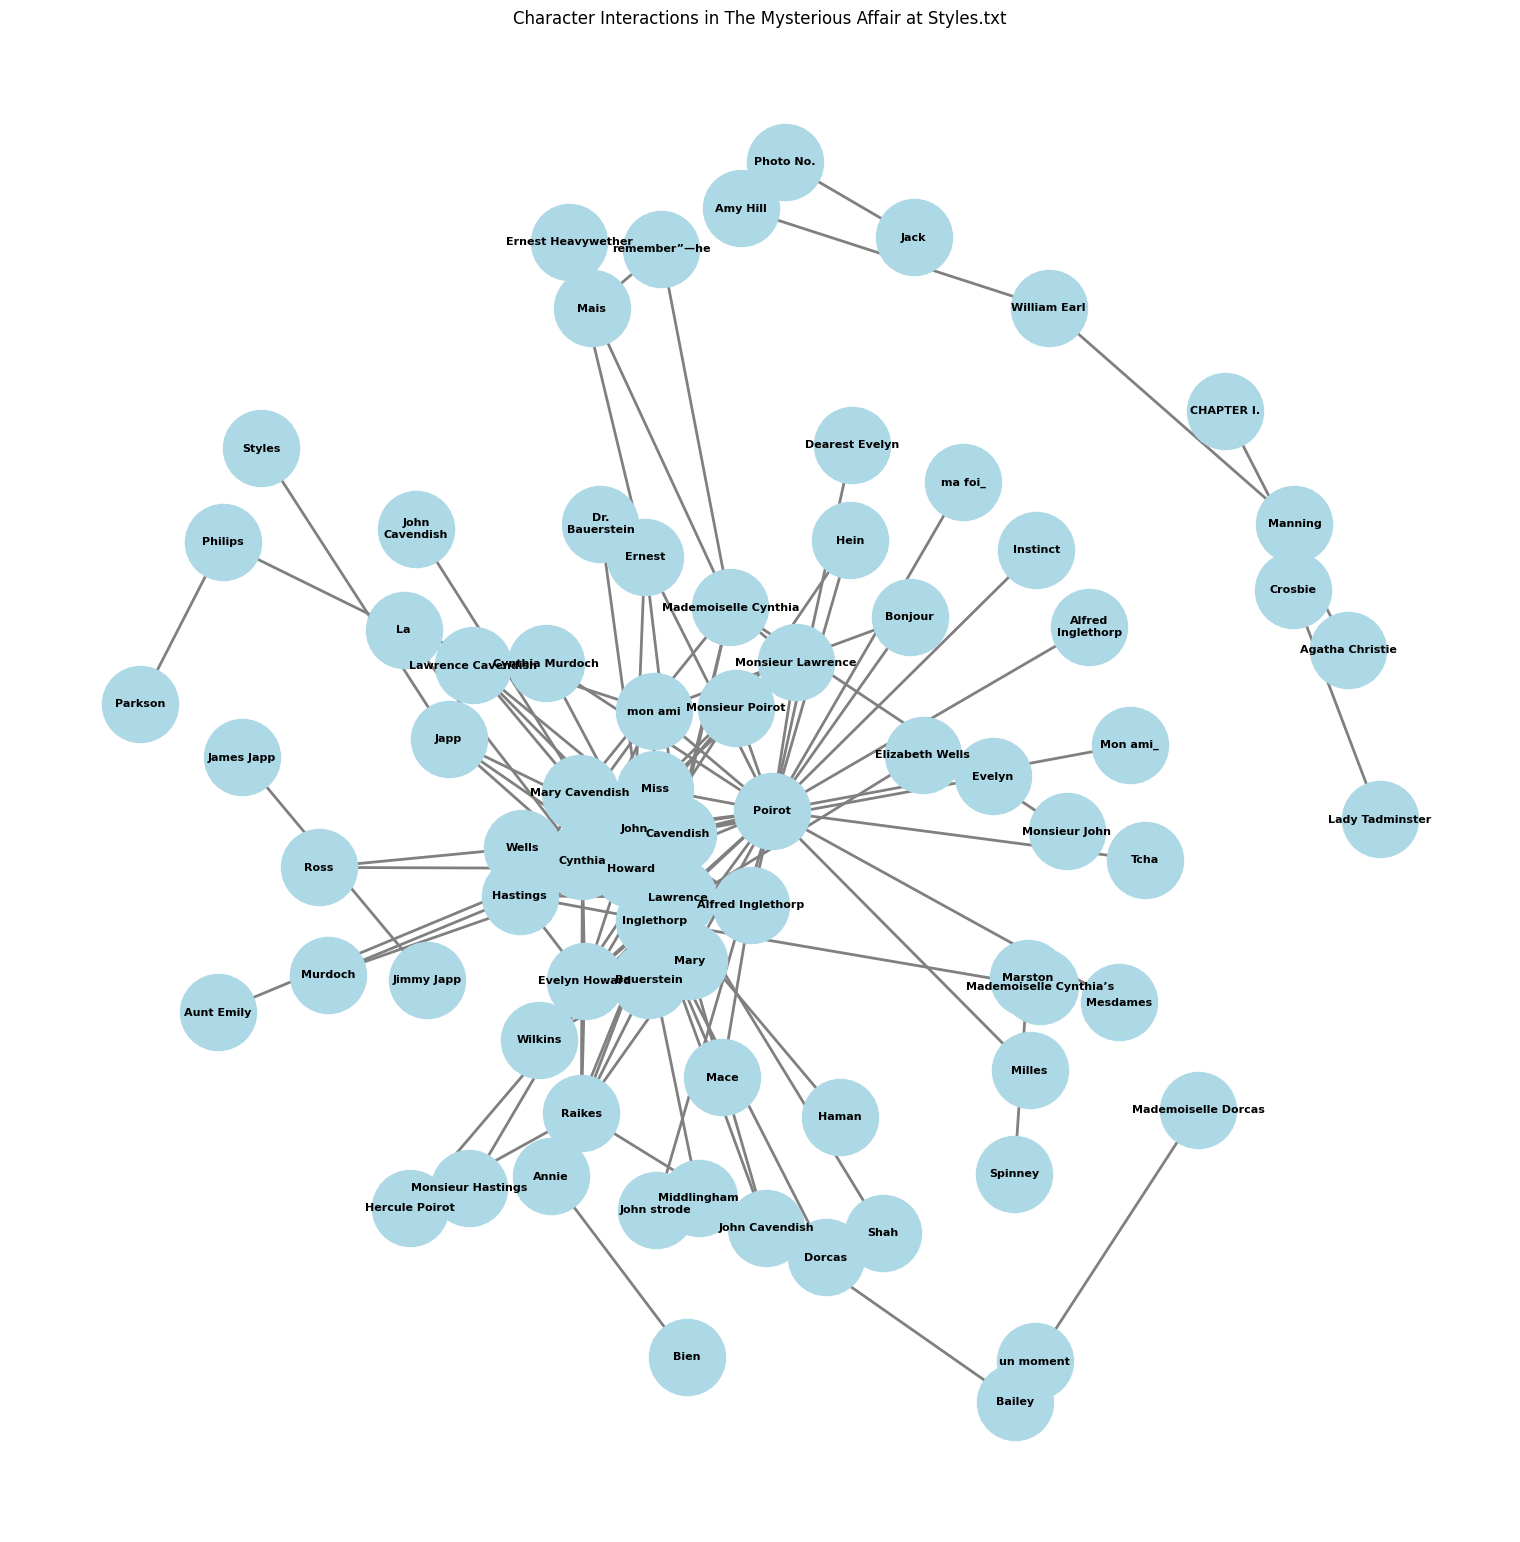

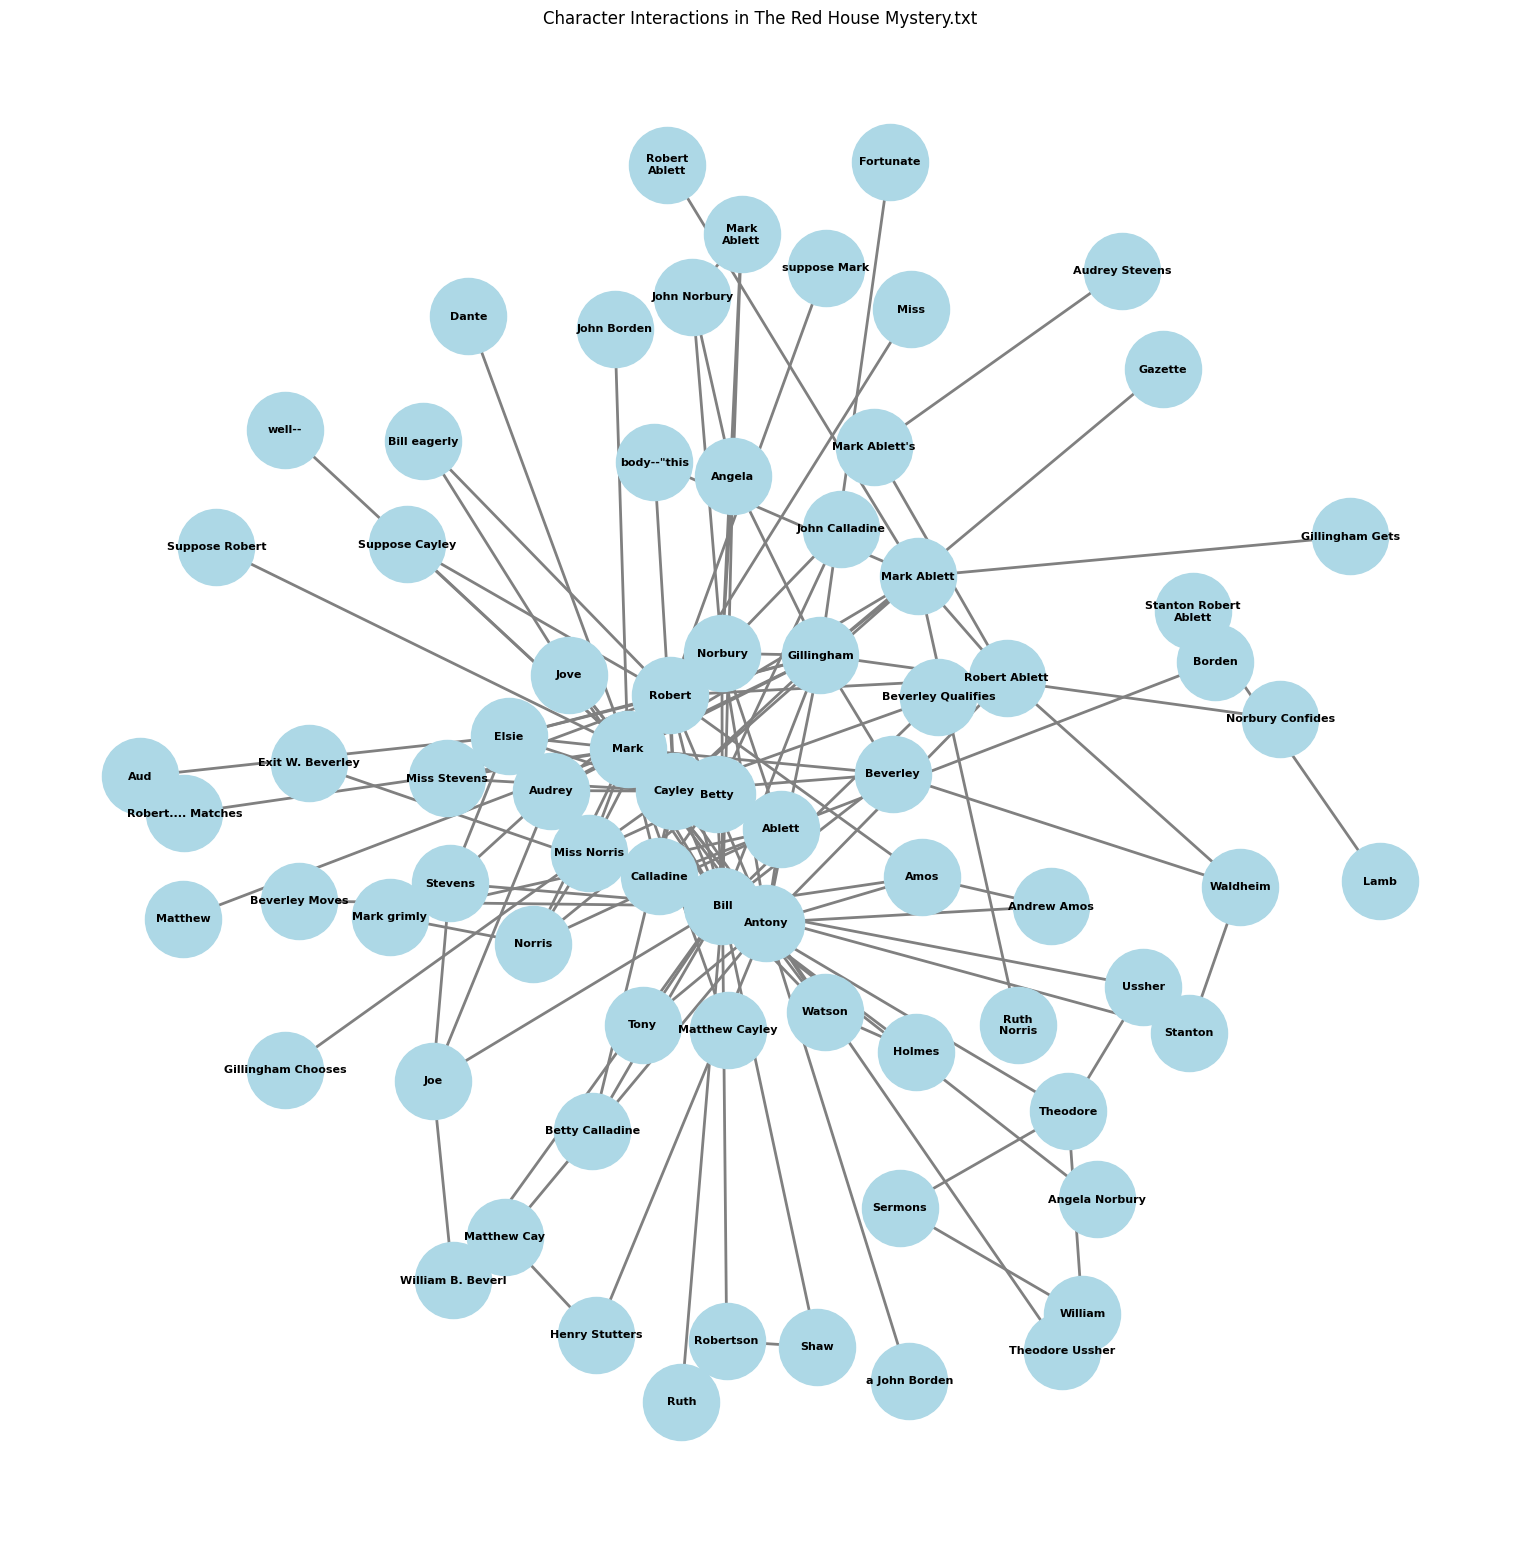

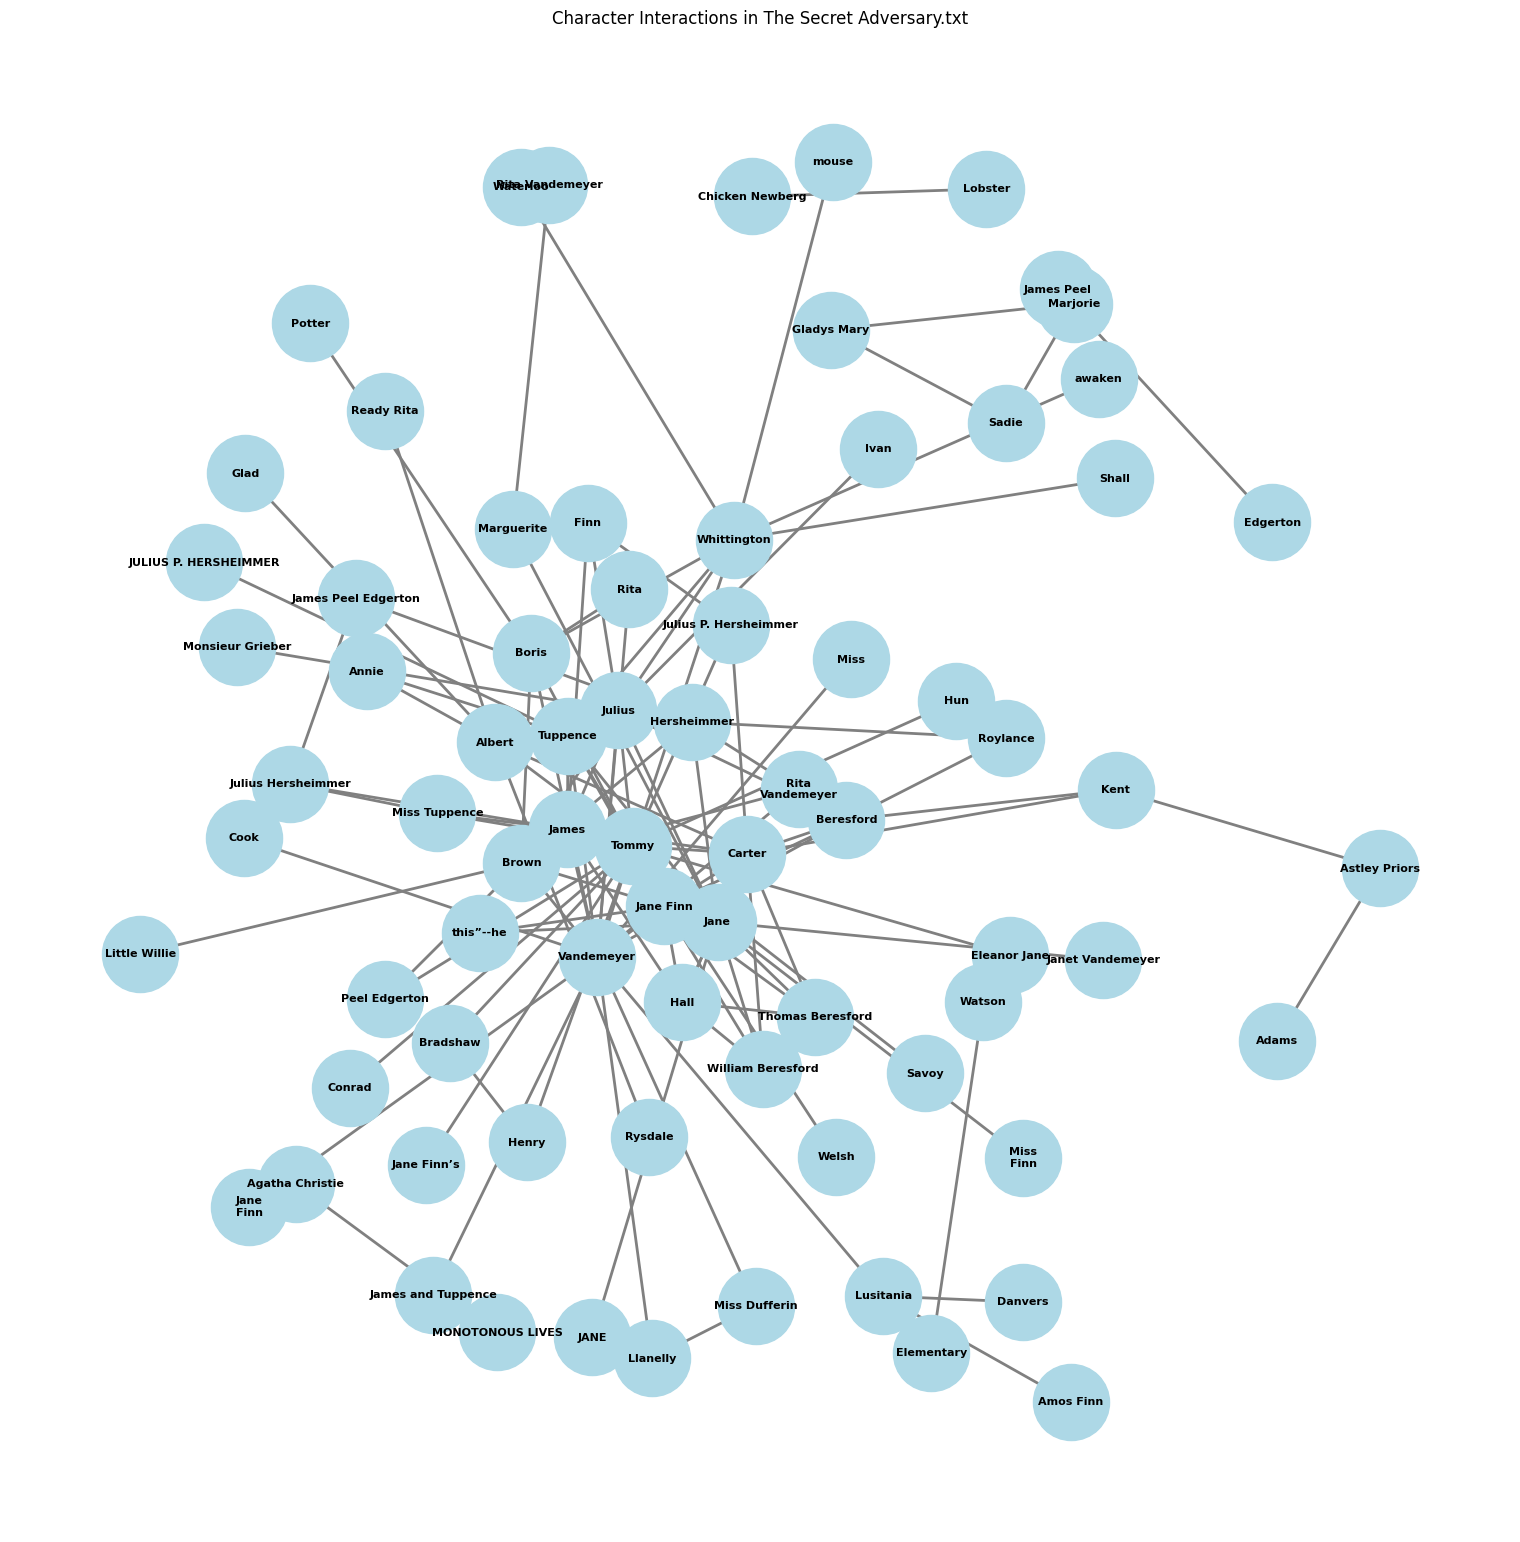

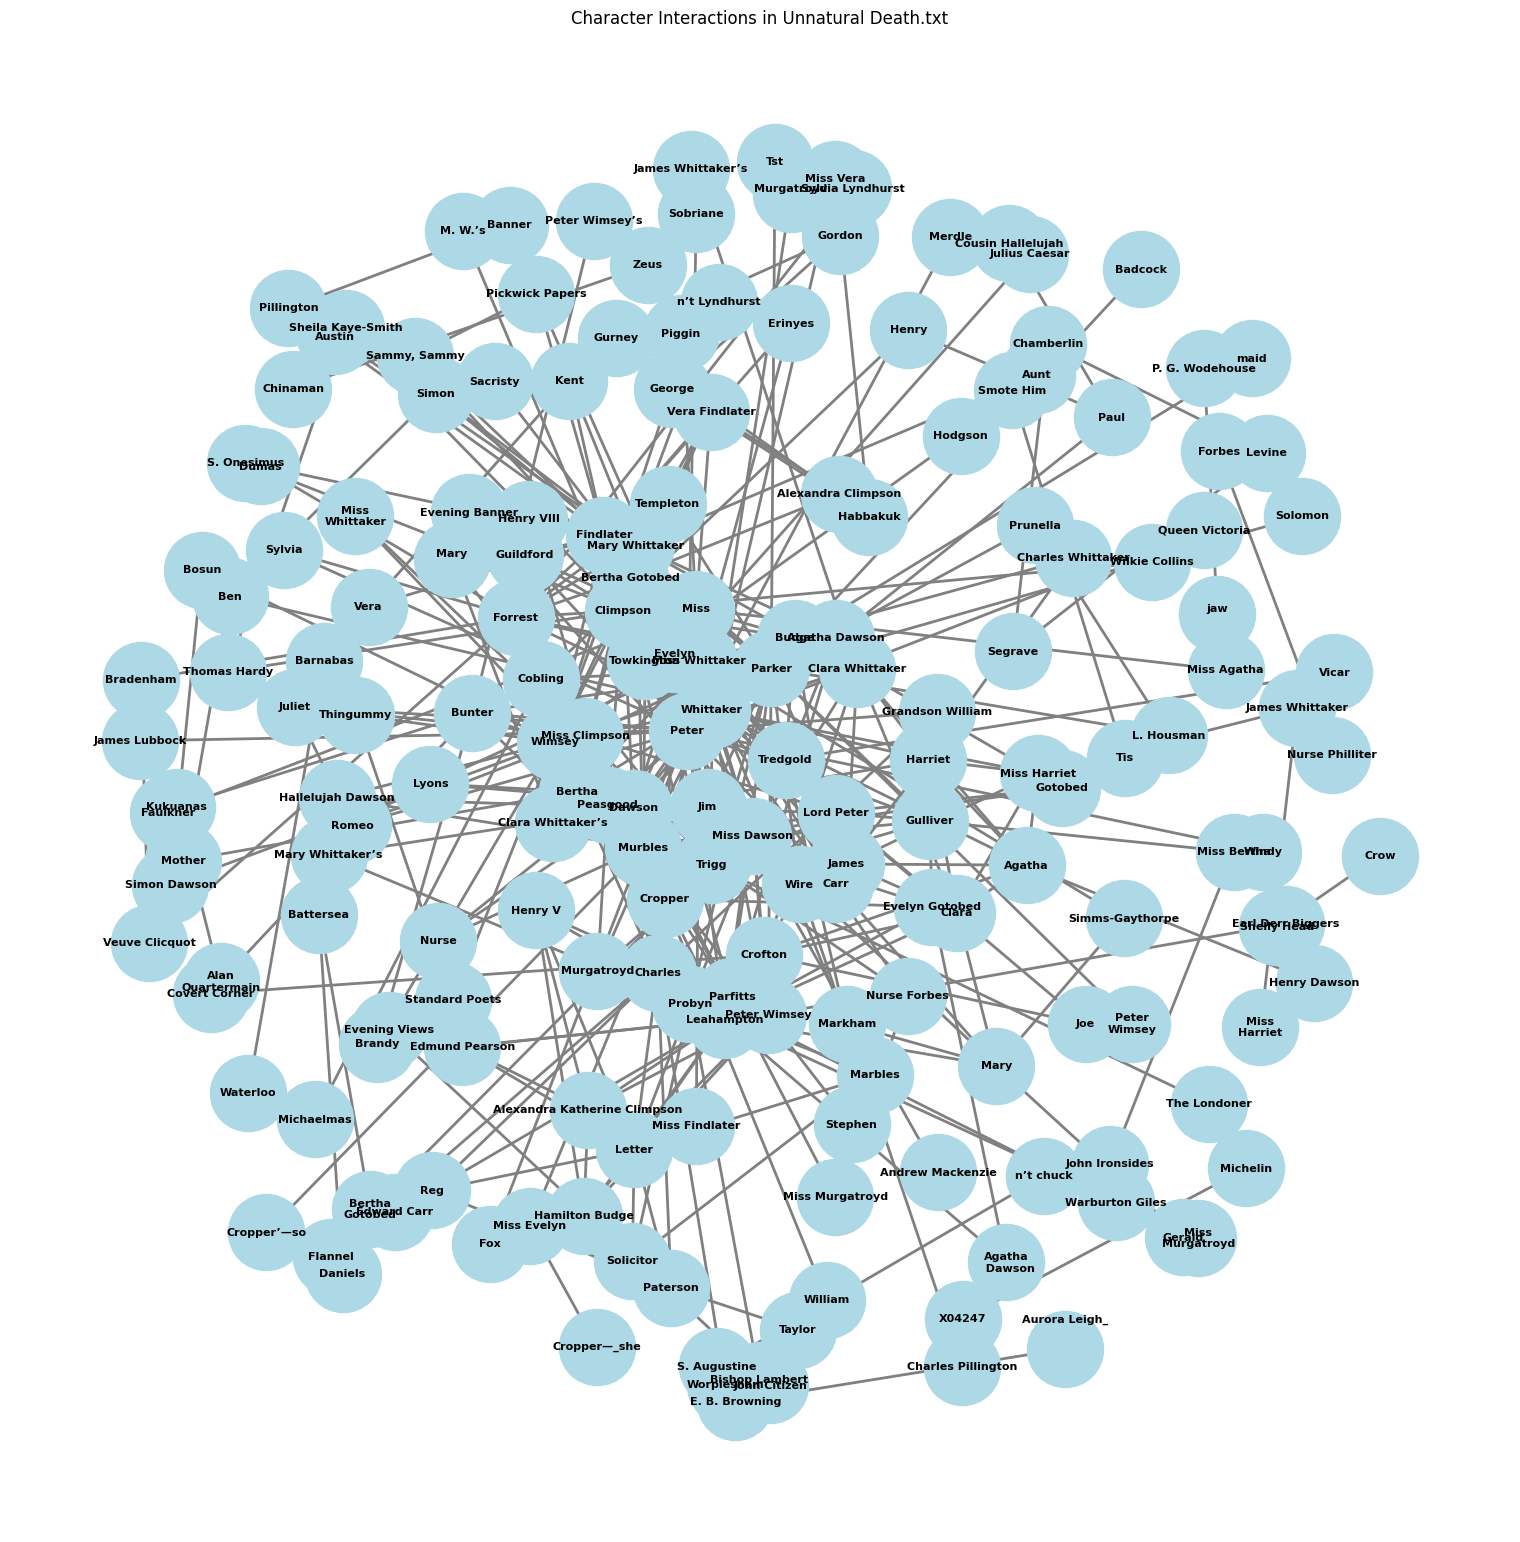

In [12]:
import spacy
import os
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

nlp = spacy.load('en_core_web_sm')

def extract_interactions(text):
    doc = nlp(text)
    interactions = defaultdict(int)

    for sent in doc.sents:
        characters = set([ent.text for ent in sent.ents if ent.label_ == "PERSON"])
        for char1 in characters:
            for char2 in characters:
                if char1 != char2:
                    interactions[(char1, char2)] += 1

    return interactions

def plot_network(interactions, title):
    G = nx.Graph()

    # Add edges with weights
    for (char1, char2), count in interactions.items():
        G.add_edge(char1, char2, weight=count)

    # Define node positions using a layout
    pos = nx.spring_layout(G, k=0.5, iterations=50)  # Adjust layout parameters

    plt.figure(figsize=(15, 15))  # Increase figure size
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue",
            font_size=8, font_weight="bold", edge_color="gray", width=2)
    plt.title(title)
    plt.axis('off')  # Turn off the axis
    plt.show()

directory_path = r'C:\Users\hosan\Downloads\Mystery_TXTS'

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            interactions = extract_interactions(text)

            # Visualize the network of interactions for each file
            plot_title = f"Character Interactions in {filename}"
            plot_network(interactions, plot_title)

In [13]:
import os
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string

def process_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = word_tokenize(text.lower())
    stopped_tokens = [word for word in tokens if word not in stopwords.words('english')]
    return stopped_tokens

# Read and process all text files
texts = []
directory_path = r'C:\Users\hosan\Downloads\Mystery_TXTS'
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
            texts.append(process_text(file.read()))

# Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Perform LDA
lda_model = models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.055*"“" + 0.052*"”" + 0.021*"’" + 0.008*"said" + 0.008*"one" + 0.007*"mr" + 0.006*"would" + 0.005*"mrs" + 0.005*"could" + 0.004*"upon"

Topic: 1 
Words: 0.045*"“" + 0.035*"”" + 0.020*"’" + 0.007*"said" + 0.005*"man" + 0.005*"upon" + 0.005*"one" + 0.005*"mr" + 0.005*"could" + 0.004*"would"

Topic: 2 
Words: 0.037*"”" + 0.036*"“" + 0.019*"’" + 0.009*"said" + 0.007*"one" + 0.005*"man" + 0.004*"would" + 0.004*"like" + 0.004*"syme" + 0.003*"know"

Topic: 3 
Words: 0.048*"“" + 0.047*"”" + 0.016*"’" + 0.009*"said" + 0.007*"one" + 0.005*"would" + 0.005*"man" + 0.004*"could" + 0.004*"upon" + 0.004*"syme"

Topic: 4 
Words: 0.039*"”" + 0.037*"’" + 0.037*"“" + 0.012*"said" + 0.006*"would" + 0.006*"one" + 0.005*"well" + 0.005*"know" + 0.005*"mr" + 0.004*"miss"



In [14]:
import os
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string
import matplotlib.pyplot as plt


def process_text(text):
    # Remove punctuation, quotations, and apostrophes
    text = text.translate(str.maketrans('', '', string.punctuation + "‘’“”"))
    
    tokens = word_tokenize(text.lower())
    stopped_tokens = [word for word in tokens if word not in stopwords.words('english')]
    return stopped_tokens

# Read and process all text files
texts = []
directory_path = r'C:\Users\hosan\Downloads\Mystery_TXTS'
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
            texts.append(process_text(file.read()))

# Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Perform LDA
lda_model = models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

# Define topic names based on interpretation of the top words
topic_names = {
    0: "Topic Name 1",
    1: "Topic Name 2",
    2: "Topic Name 3",
    3: "Topic Name 4",
    4: "Topic Name 5"
}

# Plotting the top words in each topic with topic names
num_words = 10
fig, axes = plt.subplots(5, 1, figsize=(10, 10), sharex=True)
axes = axes.flatten()

for i in range(5):
    topic = lda_model.show_topic(i, num_words)
    words, weights = zip(*topic)
    ax = axes[i]
    ax.barh(words, weights)
    ax.set_title(f'{topic_names[i]}', fontweight='bold')
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.3)
plt.show()